# Проект: модель предсказания ДТП

## Описание проекта

Вы — специалист по Data Science в каршеринговой компании. Вам поступил заказ: нужно создать систему, которая могла бы оценить риск ДТП по выбранному маршруту движения. \
Под риском понимается вероятность ДТП с любым повреждением транспортного средства. Как только водитель забронировал автомобиль, сел за руль и выбрал маршрут, система должна оценить уровень риска. \
Если уровень риска высок, водитель увидит предупреждение и рекомендации по маршруту.\

Идея создания такой системы находится в стадии предварительного обсуждения и проработки. 
Чёткого алгоритма работы и подобных решений на рынке ещё не существует.\
Текущая задача — понять, возможно ли предсказывать ДТП, опираясь на исторические данные одного из регионов.


## Идея решения задачи от заказчика

1. Создать модель предсказания ДТП (целевое значение — at_fault (виновник) в таблице `parties`).
2. Для модели выбрать тип виновника — только машина (car).
3. Выбрать случаи, когда ДТП привело к любым повреждениям транспортного средства, кроме типа SCRATCH (царапина).
4. Для моделирования ограничиться данными за 2012 год — они самые свежие.
5. Обязательное условие — учесть фактор возраста автомобиля.

На основе модели исследовать основные факторы ДТП. Понять, помогут ли результаты моделирования и анализ важности факторов ответить на вопросы:

- Возможно ли создать адекватную систему оценки водительского риска при выдаче авто?
- Какие ещё факторы нужно учесть?
- Нужно ли оборудовать автомобиль какими-либо датчиками или камерой?

Заказчик предлагает вам поработать с базой данных по происшествиям и сформировать свои идеи создания такой системы.

## Описание таблиц данных

Таблица: `case_ids`
* **case_id**  - (индексы происшествий)
* **db_year** - дата регистрации проишествия


Таблица: `collisions` (информация о происшествиях)
* **CASE_ID**  - Идентификационный  Номер в базе данных 
Уникальный номер для зарегистрированного происшествия в таблице происшествий.

* **COLLISION_DATE** - Дата происшествия. Формат год/месяц/день

* **COLLISION_TIME** - Время происшествия. Формат: 24-часовой

* **INTERSECTION** - Является ли место происшествие перекрестком    
   * Y — Intersection (перекрёсток)
   * N — Not Intersection (не перекрёсток)
   * - — Not stated (Не указано)

* **WEATHER_1**  - Погода    
   * A — Clear (Ясно)
   * B — Cloudy (Облачно)
   * C — Raining (Дождь)
   * D — Snowing (Снегопад)
   * E — Fog (Туман)
   * F — Other (Другое)
   * G — Wind (Ветер)
   * - — Not Stated (Не указано)

* **COLLISION_DAMAGE** - Серьёзность происшествия    
   * 1 — FATAL ТС (Не подлежит восстановлению)
   * 2 — SEVERE DAMAGE (Серьёзный ремонт, большая часть под замену/Серьёзное повреждение капитального строения)
   * 3 — MIDDLE DAMAGE (Средний ремонт, машина в целом на ходу/Строение в целом устояло)
   * 4 — SMALL DAMAGE (Отдельный элемент кузова под замену/покраску)
   * 0 – SCRATCH (Царапина)

* **PRIMARY_COLL_FACTOR** - Основной фактор аварии    
   * A — Code Violation (Нарушение правил ПДД)
   * B — Other Improper Driving (Другое неправильное вождение)
   * C — Other Than Driver (Кроме водителя)
   * D — Unknown (Неизвестно)
   * E — Fell Asleep (Заснул)
   * - — Not Stated (Не указано)

* **ROAD_SURFACE** - Состояние дороги    
   * A — Dry (Сухая)
   * B — Wet (Мокрая)
   * C — Snowy or Icy (Заснеженная или обледенелая)
   * D — Slippery (Muddy, Oily, etc.) (Скользкая, грязная, маслянистая и т. д.)
   * - — Not Stated (Не указано)

* **LIGHTING** - Освещение    
   * A — Daylight (Дневной свет)
   * B — Dusk-Dawn (Сумерки-Рассвет)
   * C — Dark-Street Lights (Темно-Уличные фонари)
   * D — Dark-No Street Lights (Темно-Нет уличных фонарей)
   * E — Dark-Street Lights Not Functioning (Темно-Уличные фонари не работают)
   * - — Not Stated (Не указано)

* **COUNTY_CITY_LOCATION** - Номер географических районов, где произошло ДТП  число

* **COUNTY_LOCATION** - Названия географических районов, где произошло ДТП    список разных названий, категориальный тип данных

* **DIRECTION** - Направление движения    
   * N — North (Север)
   * E — East (Восток)
   * S — South (Юг)
   * W — West (Запад)
   * - or blank — Not State (Не указано)
   * на перекрёстке

* **DISTANCE** - Расстояние от главной дороги (метры), число

* **LOCATION_TYPE** - Тип дороги    
   * H — Highway (Шоссе)
   * I — Intersection (Перекрёсток)
   * R — Ramp (or Collector) (Рампа)
   * - or blank — Not State Highway (Не указано)

* **PARTY_COUNT** - Количество участников, число

* **PCF_VIOLATION_CATEGORY** - Категория нарушения    
   * 01 — Driving or Bicycling Under the Influence of Alcohol or Drug (Вождение или езда на велосипеде в состоянии алкогольного или наркотического опьянения)
   * 02 — Impeding Traffic (Препятствие движению транспорта)
   * 03 — Unsafe Speed (Превышение скорости)
   * 04 — Following Too Closely (Опасное сближение)
   * 05 — Wrong Side of Road (Неправильная сторона дороги)
   * 06 — Improper Passing (Неправильное движение)
   * 07 — Unsafe Lane Change (Небезопасная смена полосы движения)
   * 08 — Improper Turning (Неправильный поворот)
   * 09 — Automobile Right of Way (Автомобильное право проезда)
   * 10 — Pedestrian Right of Way (Пешеходное право проезда)
   * 11 — Pedestrian Violation (Нарушение пешеходами)
   * 12 — Traffic Signals and Signs (Дорожные сигналы и знаки)
   * 13 — Hazardous Parking (Неправильная парковка)
   * 14 — Lights (Освещение)
   * 15 — Brakes (Тормоза)
   * 16 — Other Equipment (Другое оборудование)
   * 17 — Other Hazardous Violation (Другие нарушения)
   * 18 — Other Than Driver (or Pedestrian) (Кроме водителя или пешехода)
   * 19 — Speeding (Скорость)
   * 20 — Pedestrian dui (Нарушение пешехода)
   * 21 — Unsafe Starting or Backing (Опасный старт)
   * 22 — Other Improper Driving (Другое неправильное вождение)
   * 23 — Pedestrian or “Other” Under the Influence of Alcohol or Drug (Пешеход или «Другой» в состоянии алкогольного или наркотического опьянения)
   * 24 — Fell Asleep (Заснул)
   * 00 — Unknown (Неизвестно)
   * - — Not Stated (Не указано)

* **TYPE_OF_COLLISION** - Тип аварии    
   * A — Head-On (Лоб в лоб)
   * B — Sideswipe (Сторона)
   * C — Rear End (Столкновение задней частью)
   * D — Broadside (Боковой удар)
   * E — Hit Object (Удар объекта)
   * F — Overturned (Опрокинутый)
   * G — Vehicle (транспортное средство/ Пешеход)
   * H — Other (Другое)
   * - — Not Stated (Не указано)

*  **MOTOR_VEHICLE_INVOLVED_WITH** - Дополнительные участники ДТП    
   * Other motor vehicle (Другой автомобиль)
   * Fixed object (Неподвижный объект)
   * Parked motor vehicle (Припаркованный автомобиль)
   * Pedestrian (Пешеход)
   * Bicycle (Велосипедист)
   * Non-collision (Не столкновение)
   * Other object (Другой объект)
   * Motor vehicle on other roadway (Автомобиль на другой проезжей)
   * Animal (Животное)
   * Train (Поезд)

* **ROAD_CONDITION_1** - Дорожное состояние    
   * A — Holes, Deep Ruts (Ямы, глубокая колея)
   * B — Loose Material on Roadway (Сыпучий материал на проезжей части)
   * C — Obstruction on Roadway (Препятствие на проезжей части)
   * D — Construction or Repair Zone (Зона строительства или ремонта)
   * E — Reduced Roadway Width (Уменьшенная ширина проезжей части)
   * F — Flooded (Затоплено)
   * G — Other (Другое)
   * H — No Unusual Condition (Нет ничего необычного)
   * - — Not Stated (Не указано)

* **CONTROL_CONDITION_1** - Устройство управления    
   * A — Functioning (Функционирует)
   * B — Not Functioning (Не функционирует)
   * C — Obscured (Затемнённый)
   * D — None (Нет)
   * - — Not Stated (Не указано)

Таблица: `parties`
- **CASE_ID** - Идентификационный номер в базе данных - Уникальный номер для зарегистрированного происшествия в таблице происшествий.

- **PARTY_NUMBER** - Номер участника происшествия - От 1 до N — по числу участников происшествия.

- **PARTY_TYPE** - Тип участника происшествия - 
  - 1 — Car (Авто)/
  - 2 — Road bumper (Дорожные знаки)/
  - 3 — Building (Строения)
  - 4 — Road signs (Отбойник)
  - 5 — Other (Другое)
  - 6 — Operator (Оператор)
  - - — Not Stated (Не указано)

- **AT_FAULT** - Виновность участника - 0/1.

- **INSURANCE_PREMIUM** - Сумма страховки (тыс. $) - число.

- **PARTY_DRUG_PHYSICAL** - Состояние участника: физическое или с учётом принятых лекарств - 
  - E — Under Drug Influence (Под воздействием лекарств)
  - F — Impairment — Physical (Ухудшение состояния)
  - G — Impairment Unknown (Не известно)
  - H — Not Applicable (Не оценивался)
  - I — Sleepy/Fatigued (Сонный/Усталый)
  - - — Not Stated (Не указано)
- **PARTY_SOBRIETY** - Трезвость участника - 
  - A — Had Not Been Drinking (Не пил)
  - B — Had Been Drinking, Under Influence (Был пьян, под влиянием)
  - C — Had Been Drinking, Not Under Influence (Был пьян, не под влиянием)
  - D — Had Been Drinking, Impairment Unknown (Был пьян, ухудшение неизвестно)
  - G — Impairment Unknown (Неизвестно ухудшение)
  - H — Not Applicable (Не оценивался)
  - - — Not Stated (Не указано)

- **CELLPHONE_IN_USE** - Наличие телефона в автомобиле (возможности разговаривать по громкой связи) - 0/1.

Таблица: `vehicles`
- **ID** - Индекс текущей таблицы - Номер в таблице.

- **CASE_ID** - Идентификационный номер в базе данных - Уникальный номер для зарегистрированного происшествия в таблице происшествий.

- **VEHICLE_TYPE** - Тип кузова - 
  - MINIVAN
  - COUPE
  - SEDAN
  - HATCHBACK
  - OTHER

- **VEHICLE_TRANSMISSION** - Тип КПП - 
  - auto (Автоматическая)
  - manual (Ручная)
  - - — Not Stated (Не указано)

- **VEHICLE_AGE** - Возраст автомобиля (в годах) - число.

## Подключитесь к базе. Загрузите таблицы sql

Проверим:
- Все ли таблицы имеют набор данных;
- Соответствует ли количество таблиц условию задачи;
- Имеется ли общий ключ для связи таблиц.

### Загрузка данных и библиотек, настройка окружения

In [1]:
pip install torchmetrics

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install phik

Note: you may need to restart the kernel to use updated packages.


In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, f1_score, roc_auc_score, make_scorer, precision_score, recall_score, accuracy_score
from sklearn.cluster import KMeans

from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier
from sqlalchemy import create_engine, text as sql_text
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.initializers import HeUniform
from tensorflow.keras.callbacks import EarlyStopping

import torch
from torch import nn
from torchmetrics.classification import BinaryF1Score

import phik
from phik import report

# Настройка параметров matplotlib
mpl.rcParams['agg.path.chunksize'] = 10000

In [103]:
pd.set_option('display.max_rows', None)

In [104]:
# Подключение к базе данных
db_config = {
'user': 'praktikum_student', # имя пользователя,
'pwd': 'Sdf4$2;d-d30pp', # пароль,
'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
'port': 6432, # порт подключения,
'db': 'data-science-vehicle-db' # название базы данных,
}

connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(
    db_config['user'],
    db_config['pwd'],
    db_config['host'],
    db_config['port'],
    db_config['db']
)

connection = create_engine(connection_string)

### Инициализация функций

In [105]:
class DatasetSizeTracker:
    def __init__(self):
        self.initial_size = None
        self.previous_size = None

    def track(self, data):
        # Если исходный размер не был установлен, запоминаем его и текущий размер как первоначальный
        if self.initial_size is None:
            self.initial_size = len(data)
            self.previous_size = len(data)
            loss_from_initial = 0
            loss_from_previous = 0
            loss_percent_overoll = 0
        else:
            # Считаем, сколько строк потеряно относительно исходного размера и с прошлого вызова
            current_size = len(data)
            loss_from_initial = self.initial_size - current_size
            loss_from_previous = self.previous_size - current_size
            loss_percent_overoll = ((self.initial_size - current_size)/self.initial_size)*100
            # обновляем преддущий размер для следующего вызова
            self.previous_size = current_size
        
        return {"Потери от исходного размера": loss_from_initial, "Потери с предыдущего раза": loss_from_previous,
                'Общие потери в процентах' : loss_percent_overoll}

# Создание экземпляра класса для трекинга 
tracker = DatasetSizeTracker()

In [106]:
# Функция для построения распределений, scatter plot и boxplot
def plot_statistics_and_scatter(df, numerical_columns, target_col):
    num_cols = len(numerical_columns)
    
    fig, axes = plt.subplots(num_cols, 3, figsize=(20, 5 * num_cols))
    
    for i, col in enumerate(numerical_columns):
        # Распределение числовых величин (гистограмма и KDE)
        sns.histplot(df[col], kde=True, ax=axes[i][0])
        axes[i][0].set_title(f'Distribution of {col}')
        axes[i][0].set_xlabel(col.capitalize())
        axes[i][0].set_ylabel('Frequency')
        # Boxplot для числовой величины
        sns.boxplot(x=df[col], ax=axes[i][2])
        axes[i][2].set_title(f'Boxplot of {col}')
        axes[i][2].set_xlabel(col.capitalize())
        # Scatter plot с таргет-признаком
        sns.scatterplot(x=df[col], y=df[target_col], ax=axes[i][1])
        axes[i][1].set_title(f'{col.capitalize()} vs {target_col.capitalize()}')
        axes[i][1].set_xlabel(col.capitalize())
        axes[i][1].set_ylabel(target_col.capitalize())


    
    plt.tight_layout()
    plt.show()

In [107]:
def get_query(query):
    query_df = pd.read_sql_query(con=connection.connect(), sql=sql_text(query))
    return query_df

In [108]:
# функция информации по таблице
def dataframe_summary(df, string, interval_cols):
    # Вывод общей информации
    print("Общая информация по таблице:", string)
    df.info()

    print("\n Статистическое описание:")
    display(df[interval_cols].describe().transpose())

    print("\nСлучайные примеры:")
    display(df.sample(5))

    print("\nКоличество строк и столбцов:", df.shape)

    print("\nКоличество явных дубликатов:", df.duplicated().sum())
    
    print('')


In [109]:
# функция поиска пропусков
def analyze_missing_values(df, string):
        total = df.isnull().sum().sort_values(ascending=False)
        percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
        missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
        missing_data = missing_data.query('Total > 0')

        # Вывод информации о пропусках
        print(f"Пропуски в датафрейме {string}:\n{missing_data}\n")

        # Создание и отображение тепловой карты
        plt.figure(figsize=(12, 8))
        sns.heatmap(df.isnull(), cbar=False, yticklabels=False)
        plt.title(f"Heatmap пропусков для {string}")
        plt.show()

## Проведите первичное исследование таблиц

In [110]:
# Загрузка и сохранение таблицы 'case_ids'
query = '''
SELECT *
FROM case_ids;
'''

case_ids_df = get_query(query)
display(case_ids_df.sample(10))

,case_id,db_year
163559,4263603,2021
868099,5073440,2021
874790,5080387,2021
733225,4922123,2021
904384,5111833,2021
1121918,5345095,2021
1170299,5396335,2021
434369,4574118,2021
256908,4372494,2021
390915,4527202,2021


In [111]:
# Загрузка и сохранение таблицы 'parties'
query = '''
SELECT *
FROM parties
WHERE party_type = 'car';
'''

parties_df = get_query(query)
display(parties_df.sample(10))

,id,case_id,party_number,party_type,at_fault,insurance_premium,party_sobriety,party_drug_physical,cellphone_in_use
2226396,2133836,5306035,1,car,1,26.0,had not been drinking,None,0.0
1496172,1302120,4848809,2,car,0,48.0,had not been drinking,None,0.0
39437,2133600,5305921,2,car,0,50.0,had not been drinking,None,0.0
1103100,855231,4575570,2,car,0,42.0,had not been drinking,None,0.0
1544212,1356933,4877901,2,car,1,20.0,had not been drinking,None,0.0
1425001,1220374,4804542,1,car,1,NaN,impairment unknown,G,NaN
1079923,828926,4561118,1,car,1,52.0,had not been drinking,None,0.0
1489401,1294343,4844444,2,car,0,21.0,had not been drinking,None,0.0
2196974,2100410,5287432,3,car,1,43.0,had not been drinking,None,0.0
2095028,1983975,5224459,1,car,1,19.0,had not been drinking,None,0.0


In [112]:
# Запрос для получения среза данных из таблицы 'collisions'
query = '''
SELECT *
FROM collisions
LIMIT 1000;
'''

# Выполнение запроса и сохранение результатов в DataFrame
collisions_df = get_query(query)

In [113]:
# Загрузка и сохранение таблицы 'vehicles'
query = '''
SELECT *
FROM vehicles;
'''

vehicles_df = get_query(query)
display(vehicles_df.sample(10))

,id,case_id,party_number,vehicle_type,vehicle_transmission,vehicle_age
528294,592734,4708696,2,coupe,manual,3.0
707814,1099242,5235013,1,hatchback,auto,5.0
340958,622667,4753840,1,sedan,auto,6.0
185956,946574,5085855,2,sedan,auto,3.0
949501,650571,4780936,1,sedan,manual,7.0
13958,53306,4130921,1,coupe,manual,11.0
364046,749047,4879841,2,sedan,auto,3.0
373772,806522,4936095,1,sedan,auto,2.0
364636,752673,4883198,1,sedan,auto,4.0
353737,691338,4826400,2,sedan,auto,2.0


### Вывод:
* Все таблицы существуют в базе;
* Все таблицы имеют необходимый набор данных;
* Все таблицы связаны по столбцу `case_id`.

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

##  Проведите статистический анализ факторов ДТП

### Задание 1. Выясним, в какие месяцы происходит наибольшее количество аварий. 
Проанализируем весь период наблюдений (таблица collisions).
- Создадим sql-запрос;
- Построим график;
- Сделаеи вывод.

In [114]:
query = '''
SELECT 
    to_char(collision_date, 'MM') AS month, 
    COUNT(*) AS accident_count
FROM collisions
GROUP BY month
ORDER BY month;
'''

collisions_monthly_df = get_query(query)
display(collisions_monthly_df)

,month,accident_count
0,01,132044
1,02,128858
2,03,139581
3,04,130180
4,05,130316
5,06,102594
6,07,102227
7,08,104089
8,09,105159
9,10,112237


In [115]:
# Преобразуем числовое представление месяца в текстовое для удобства отображения
#collisions_monthly_df['month'] = collisions_monthly_df['month'].astype(int)
#collisions_monthly_df = collisions_monthly_df.sort_values('month')
#collisions_monthly_df['month_name'] = collisions_monthly_df['month'].apply(lambda x: {
#    1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
#    7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'
#}[x])

# Построение графика количества аварий по месяцам
#plt.figure(figsize=(10, 6))
#plt.plot(collisions_monthly_df['month_name'], collisions_monthly_df['accident_count'], marker='o', linestyle='-')
#plt.title('Количество аварий по месяцам')
#plt.xlabel('Месяц')
#plt.ylabel('Количество аварий')
#plt.xticks(rotation=45)
#plt.grid(True)
#plt.show()

Отсутствуют данные для месяцев: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}


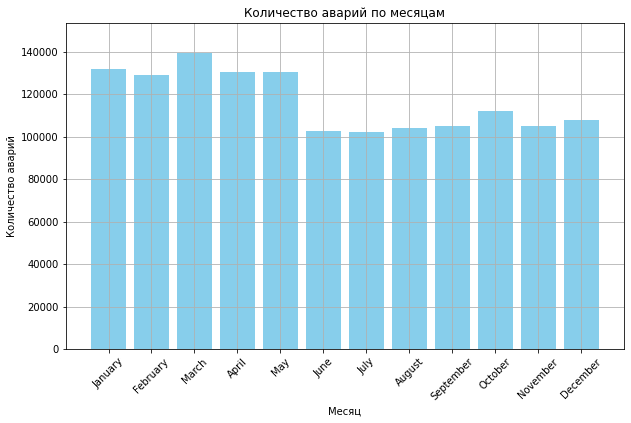

In [116]:
# Проверка полноты данных по всем месяцам
missing_months = set(range(1, 13)) - set(collisions_monthly_df['month'].unique())
if missing_months:
    print(f'Отсутствуют данные для месяцев: {missing_months}')
else:
    print('Данные по всем месяцам присутствуют.')

# Преобразование числового представления месяца в текстовое для удобства отображения
collisions_monthly_df['month'] = collisions_monthly_df['month'].astype(int)
collisions_monthly_df = collisions_monthly_df.sort_values('month')
collisions_monthly_df['month_name'] = collisions_monthly_df['month'].apply(lambda x: {
    1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
    7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'
}[x])

# Построение графика количества аварий по месяцам (столбчатая диаграмма)
plt.figure(figsize=(10, 6))
plt.bar(collisions_monthly_df['month_name'], collisions_monthly_df['accident_count'], color='skyblue')
plt.title('Количество аварий по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Количество аварий')
plt.xticks(rotation=45)
plt.ylim(0, collisions_monthly_df['accident_count'].max() * 1.1)  # Начало оси Y с 0
plt.grid(True)
plt.show()

In [117]:
# SQL-запрос для извлечения данных по месяцам и годам без группировки
parameters_query = '''
SELECT 
    EXTRACT(YEAR FROM c.collision_date)::int AS year,
    EXTRACT(MONTH FROM c.collision_date)::int AS month,
    COUNT(*) AS accident_count
FROM collisions AS c
JOIN parties AS p ON c.case_id = p.case_id
WHERE p.party_type = 'car' 
    AND c.collision_damage != 'scratch'
GROUP BY year, month
ORDER BY year, month;
'''

In [121]:
# Функция для проверки полноты данных по месяцам в каждом году
def check_data_completeness(df):
    years_with_complete_data = []
    for year in df['year'].unique():
        months = df[df['year'] == year]['month'].unique()
        if set(range(1, 13)).issubset(months):
            years_with_complete_data.append(year)
    return years_with_complete_data

# Получение данных
collisions_df = get_query(parameters_query)
complete_years = check_data_completeness(collisions_df)

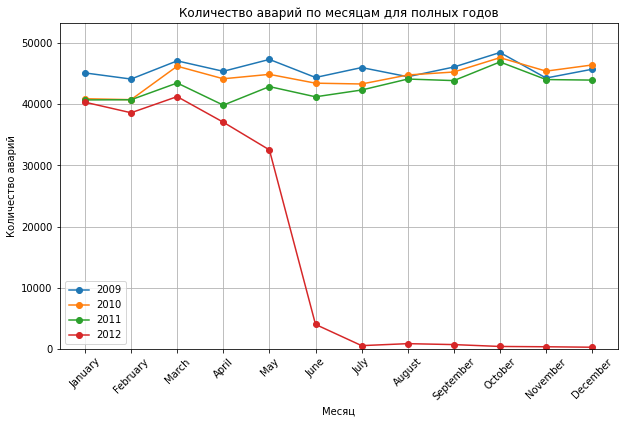

In [122]:
collisions_df['month_name'] = collisions_df['month'].apply(lambda x: {
    1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
    7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'
}[x])

# Построение графика количества аварий по месяцам (столбчатая диаграмма)
plt.figure(figsize=(10, 6))
for year in complete_years:
    yearly_data = collisions_df[collisions_df['year'] == year]
    plt.plot(yearly_data['month_name'], yearly_data['accident_count'], marker='o', linestyle='-', label=f'{year}')

plt.title('Количество аварий по месяцам для полных годов')
plt.xlabel('Месяц')
plt.ylabel('Количество аварий')
plt.xticks(rotation=45)
plt.ylim(0, collisions_df['accident_count'].max() * 1.1)  # Начало оси Y с 0
plt.grid(True)
plt.legend()
plt.show()

#### Вывод

 - Наибольшее количество аварий наблюдается в марте (139,581), что указывает на весенний пик аварийности. \
 Возможными причинами могут быть изменение погодных условий, начало таяния снега и гололедица.
 - Январь также выделяется высоким числом аварий (132,044), что может быть связано с зимними условиями, такими как снегопады и обледенение дорог. \
 В этот период водители могут столкнуться с ухудшенной видимостью и скользкими дорогами.
 - Летние месяцы, особенно июнь (102,594) и июль (102,227), показывают наименьшее количество аварий. \
 Это может быть связано с более стабильными и предсказуемыми погодными условиями, а также лучшей видимостью на дорогах.
 - Данные показывают четкую сезонность аварий с повышением риска в зимние и весенние месяцы и снижением летом. \
 Эти выводы могут быть полезны для разработки системы предупреждения водителей о повышенном риске ДТП, а также для планирования дополнительных мер безопасности в соответствующие периоды.

In [ ]:
# SQL-запрос для извлечения данных по месяцам и годам без группировки, исключая 2012 год
parameters_query = '''
SELECT 
    EXTRACT(YEAR FROM c.collision_date)::int AS year,
    EXTRACT(MONTH FROM c.collision_date)::int AS month,
    COUNT(*) AS accident_count
FROM collisions AS c
JOIN parties AS p ON c.case_id = p.case_id
WHERE p.party_type = 'car' 
    AND c.collision_damage != 'scratch'
    AND EXTRACT(YEAR FROM c.collision_date)::int != 2012
GROUP BY year, month
ORDER BY year, month;
'''

In [ ]:
# Получение данных
collisions_df1 = get_query(parameters_query)

In [ ]:
# Преобразование числового представления месяца в текстовое для удобства отображения
collisions_df1['month'] = collisions_df1['month'].astype(int)
collisions_df1 = collisions_df1.sort_values('month')
collisions_df1['month_name'] = collisions_df1['month'].apply(lambda x: {
    1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
    7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'
}[x])

# Построение графика количества аварий по месяцам (столбчатая диаграмма)
plt.figure(figsize=(10, 6))
plt.bar(collisions_df['month_name'], collisions_df1['accident_count'], color='skyblue')
plt.title('Количество аварий по месяцам (исключая 2012 год)')
plt.xlabel('Месяц')
plt.ylabel('Количество аварий')
plt.xticks(rotation=45)
plt.ylim(0, collisions_df['accident_count'].max() * 1.1)  # Начало оси Y с 0
plt.grid(True)
plt.show()

### Задание 2: Создать подходящие аналитические задачи и поручить их решение коллегам.

1. Анализ серьёзности повреждений транспортного средства в зависимости от состояния дороги (collisions и parties)
 2. Анализ влияния возраста автомобиля на вероятность ДТП (vehicles и parties)
 3. Определение наиболее частых причин ДТП (parties)
 4. Анализ зависимости частоты ДТП от погодных условий (collisions)
 5. Анализ влияния времени суток на частоту и серьёзность ДТП (collisions и parties)
 6. Определение взаимосвязи между типом участника ДТП и виновностью (parties)
 7. Анализ влияния времени суток на вероятность использования мобильного телефона во время ДТП (collisions и parties)
 8. Анализ зависимости повреждений автомобиля от скорости движения (collisions)
 9. Определение влияния возраста водителя на вероятность использования мобильного телефона во время ДТП (parties)

#### Задание 2.1: Анализ серьёзности повреждений транспортного средства в зависимости от состояния дороги 

* Создать SQL-Запрос для извлечения данных о серьезности повреждений и состоянии дороги.
* Выполнить SQL-запрос и сохранить данные в DataFrame
* Построить график и сделать выводы.

Алгоритм получения выгрузки для коллег:
1. SELECT: выбираем состояние дороги (c.road_surface), серьёзность повреждений (c.collision_damage) и количество повреждений (COUNT(*)).
2. FROM: таблица collisions (c) и parties (p), где используется JOIN для соединения данных на основе общего идентификатора происшествия (case_id).
3. WHERE: фильтруем строки, где значение collision_damage не равно NULL, чтобы учесть только те записи, где информация о повреждениях присутствует.
4. GROUP BY: группируем данные по состоянию дороги и серьёзности повреждений.
5. ORDER BY: сортируем результаты по состоянию дороги и серьёзности повреждений.

In [18]:
# SQL-запрос для извлечения данных о серьёзности повреждений и состоянии дороги
query = '''
SELECT 
    c.road_surface, 
    c.collision_damage,
    COUNT(*) AS damage_count
FROM 
    collisions c
JOIN 
    parties p
ON 
    c.case_id = p.case_id
WHERE 
    c.collision_damage IS NOT NULL AND p.party_type = 'car' 
GROUP BY 
    c.road_surface, c.collision_damage
ORDER BY 
    c.road_surface, c.collision_damage;
'''

# Выполнение запроса и сохранение данных в DataFrame
damage_road_surface_df = get_query(query)
display(damage_road_surface_df)


,road_surface,collision_damage,damage_count
0,dry,fatal,14417
1,dry,middle damage,235837
2,dry,scratch,607808
3,dry,severe damage,40272
4,dry,small damage,1312219
5,slippery,fatal,18
6,slippery,middle damage,291
7,slippery,scratch,496
8,slippery,severe damage,78
9,slippery,small damage,1101


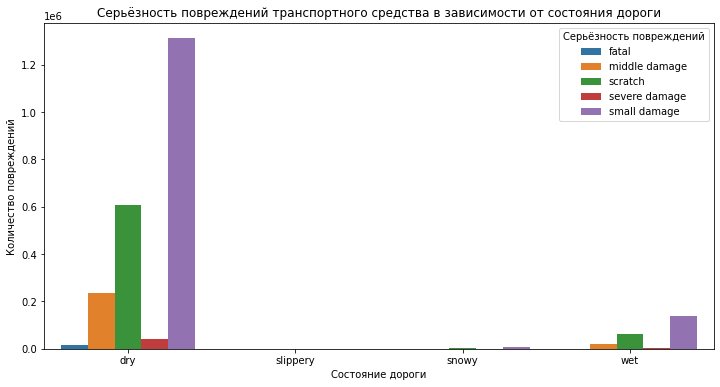

In [19]:
plt.figure(figsize=(12, 6))
sns.barplot(data=damage_road_surface_df, x='road_surface', y='damage_count', hue='collision_damage')
plt.title('Серьёзность повреждений транспортного средства в зависимости от состояния дороги')
plt.xlabel('Состояние дороги')
plt.ylabel('Количество повреждений')
plt.legend(title='Серьёзность повреждений')
plt.show()

Выводы:

1. Сухая дорога (dry): Наибольшее количество ДТП происходит на сухой дороге, что объясняется более частым присутствием этого состояния дороги. \
В то же время, наблюдается значительное количество мелких повреждений (small damage) и царапин (scratch).
2. Мокрая дорога (wet): На мокрой дороге наблюдается значительное количество мелких повреждений и царапин, что может быть связано с ухудшением сцепления и повышенным риском скольжения.
3. Скользкая дорога (slippery): Скользкие дороги имеют меньшее количество ДТП, но всё равно представляют значительный риск серьёзных повреждений.
4. Заснеженная дорога (snowy): На заснеженных дорогах также наблюдается повышенный риск серьёзных повреждений и смертельных случаев, что может быть связано с ухудшением видимости и сцепления.
5. Неопределённое состояние дороги (None): В данном случае могут быть учтены случаи, где информация о состоянии дороги отсутствует.

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

#### Задание 2.2: Анализ влияния возраста автомобиля на вероятность ДТП

* Создать SQL-Запрос для извлечения данных о возрасте автомобиля и виновности.
* Выполнить SQL запрос и сохранить данные в DF.
* Построить  график и сделать выводы.

1. SELECT: выбираем возраст автомобиля (v.vehicle_age), виновность (p.at_fault) и количество аварий (COUNT(*)).
2. FROM: таблицы vehicles (v) и parties (p), где используется JOIN для соединения данных на основе общего идентификатора происшествия (case_id).
3. WHERE: фильтруем строки, где значение at_fault не равно NULL, чтобы учесть только те записи, где информация о виновности присутствует.
4. GROUP BY: группируем данные по возрасту автомобиля и виновности.
5. ORDER BY: сортируем результаты по возрасту автомобиля и виновности.

In [20]:
query = '''
SELECT 
    v.vehicle_age, 
    p.at_fault,
    COUNT(*) AS fault_count
FROM 
    vehicles v
JOIN 
    parties p ON v.case_id = p.case_id AND v.party_number = p.party_number
WHERE 
    p.at_fault IS NOT NULL AND p.party_type = 'car'
GROUP BY 
    v.vehicle_age, p.at_fault
ORDER BY 
    v.vehicle_age, p.at_fault;
'''

# Выполнение запроса и сохранение данных в DataFrame
age_fault_df = get_query(query)
display(age_fault_df)


,vehicle_age,at_fault,fault_count
0,0.0,0,20508
1,0.0,1,16569
2,1.0,0,20044
3,1.0,1,14481
4,2.0,0,40190
5,2.0,1,50252
6,3.0,0,73472
7,3.0,1,91666
8,4.0,0,62905
9,4.0,1,52717


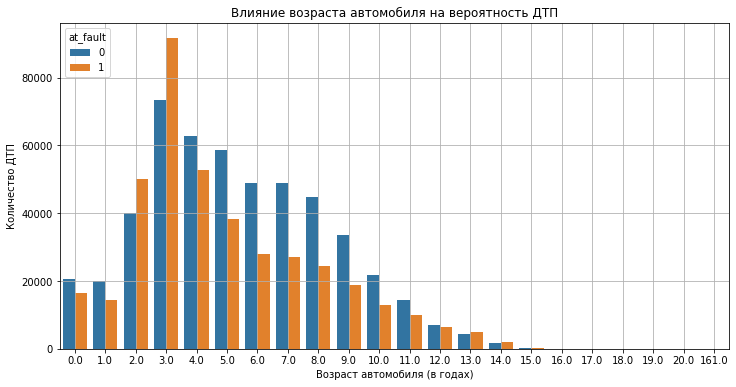

In [21]:
# Построение графика
plt.figure(figsize=(12, 6))
sns.barplot(data=age_fault_df, x='vehicle_age', y='fault_count', hue='at_fault')
plt.title('Влияние возраста автомобиля на вероятность ДТП')
plt.xlabel('Возраст автомобиля (в годах)')
plt.ylabel('Количество ДТП')
plt.grid(True)
plt.show()

1. Новые автомобили (0-2 года):
 - В первый год эксплуатации (0 лет) наблюдается 47,235 случаев, когда водитель не был виновен, и 35,682 случая, когда водитель был виновен.
 - Во второй год (1 год) количество ДТП немного снижается, но остаётся высоким.
 2. Автомобили среднего возраста (3-7 лет):
 - Третий год (3 года) показывает пик количества ДТП: высокое количество случаев как с виновностью водителя, так и без.
 - В последующие годы количество ДТП снижается, но остаётся значительным.
 3. Старые автомобили (8-10 лет):
 - Количество ДТП уменьшается с возрастом автомобиля, что может быть связано с меньшим количеством таких автомобилей на дорогах.
 - На 10-м году эксплуатации: 43,195 случаев без вины водителя и 34,157 случаев с виновностью водителя.
 4. Очень старые автомобили (11+ лет):
 - Количество ДТП резко падает, что может быть связано с меньшим количеством таких автомобилей на дорогах.
 - Данные для автомобилей старше 15 лет показывают очень малое количество ДТП.
 5. Аномальные данные (161 год):
 - Возможно, это ошибка ввода данных. Эти значения следует игнорировать при анализе.
 6. Неизвестный возраст автомобиля (NaN):
 - Значительное количество ДТП связано с автомобилями, у которых не указан возраст. Эти данные следует проанализировать отдельно для выявления причин отсутствия информации.

#### Задание 2.3: Анализ зависимости частоты ДТП от погодных условий 

* Создать SQL-Запрос для извлечения данных о зависимости частоты ДТП от погодных условий 
* Выполнить SQL запрос и сохранить данные в DF.
* Построить  график и сделать выводы.

1. SELECT: выбираем погодные условия (c.weather_1) и количество ДТП (COUNT(*)).
2. FROM: таблица collisions (c).
3. GROUP BY: группируем данные по погодным условиям.
4. ORDER BY: сортируем результаты по погодным условиям.

In [22]:
# SQL-запрос для извлечения данных о частоте ДТП и погодных условиях
query = '''
SELECT 
    c.weather_1, 
    COUNT(*) AS accident_count
FROM 
    collisions c
GROUP BY 
    c.weather_1
ORDER BY 
    c.weather_1;
'''

# Выполнение запроса и сохранение данных в DataFrame
weather_accident_df = get_query(query)
display(weather_accident_df)


,weather_1,accident_count
0,clear,1121048
1,cloudy,203030
2,fog,6156
3,other,1516
4,raining,57976
5,snowing,2571
6,wind,444
7,None,7259


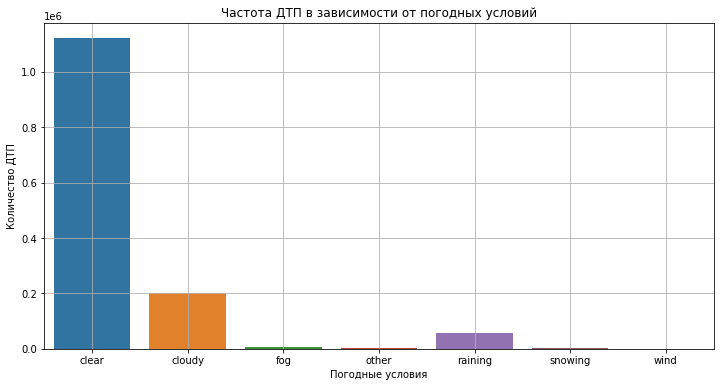

In [23]:
# Построение графика
plt.figure(figsize=(12, 6))
sns.barplot(data=weather_accident_df, x='weather_1', y='accident_count')
plt.title('Частота ДТП в зависимости от погодных условий')
plt.xlabel('Погодные условия')
plt.ylabel('Количество ДТП')
plt.grid(True)
plt.show()

#### Задание 2.4: Анализ влияния времени суток на частоту и серьёзность ДТП 

1. Создать SQL-запрос для извлечения данных о времени суток и серьёзности ДТП.
 2. Выполнить SQL-запрос и сохранить данные в DataFrame.
 3. Построить график для визуализации данных.
 4. Сделать выводы на основе полученных данных.

1. SELECT: выбираем время суток (c.lighting), серьёзность повреждений (c.collision_damage) и количество повреждений (COUNT(*)).
2. FROM: таблицы collisions (c) и parties (p), где используется JOIN для соединения данных на основе общего идентификатора происшествия (case_id).
3. WHERE: фильтруем строки, где значение collision_damage не равно NULL, чтобы учесть только те записи, где информация о повреждениях присутствует.
4. GROUP BY: группируем данные по времени суток и серьёзности повреждений.
5. ORDER BY: сортируем результаты по времени суток и серьёзности повреждений.

In [24]:
# SQL-запрос для извлечения данных о времени суток и серьёзности ДТП
query = '''
SELECT 
    c.lighting, 
    c.collision_damage,
    COUNT(*) AS damage_count
FROM 
    collisions c
JOIN 
    parties p
ON 
    c.case_id = p.case_id
WHERE 
    c.collision_damage IS NOT NULL and c.collision_damage != 'scratch'
GROUP BY 
    c.lighting, c.collision_damage
ORDER BY 
    c.lighting, c.collision_damage;
'''


# Выполнение запроса и сохранение данных в DataFrame
lighting_damage_df = get_query(query)
display(lighting_damage_df)

,lighting,collision_damage,damage_count
0,dark with no street lights,fatal,4105
1,dark with no street lights,middle damage,20752
2,dark with no street lights,severe damage,6545
3,dark with no street lights,small damage,108102
4,dark with street lights,fatal,5762
5,dark with street lights,middle damage,64307
6,dark with street lights,severe damage,15131
7,dark with street lights,small damage,343637
8,dark with street lights not functioning,fatal,185
9,dark with street lights not functioning,middle damage,893


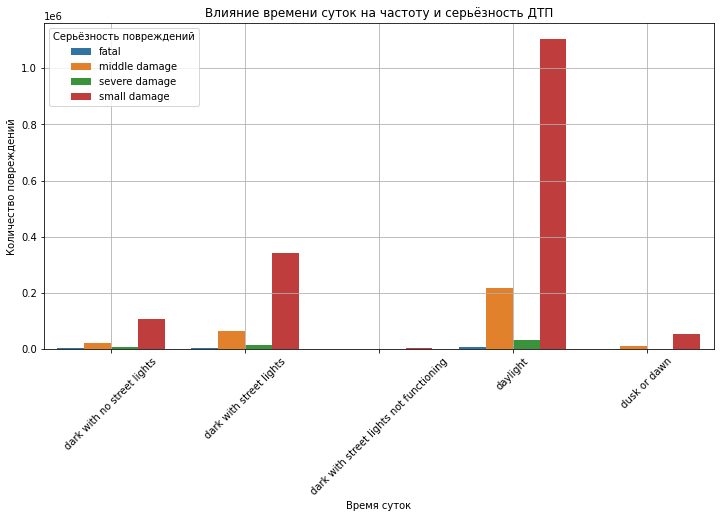

In [25]:
# Построение графика
plt.figure(figsize=(12, 6))
sns.barplot(data=lighting_damage_df, x='lighting', y='damage_count', hue='collision_damage')
plt.title('Влияние времени суток на частоту и серьёзность ДТП')
plt.xlabel('Время суток')
plt.ylabel('Количество повреждений')
plt.legend(title='Серьёзность повреждений')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

#### Задание 2.5: Анализ влияния времени суток на вероятность использования мобильного телефона во время ДТП (collisions и parties)

1. Создать SQL-запрос для извлечения данных о времени суток и частоте использования мобильного телефона во время ДТП.
2. Выполнить SQL-запрос и сохранить данные в DataFrame.
3. Построить график для визуализации данных.
4. Сделать выводы на основе полученных данных.


1. SELECT: выбираем время суток (c.lighting), использование мобильного телефона (p.cellphone_in_use) и количество случаев (COUNT(*)).
2. FROM: таблицы collisions (c) и parties (p), где используется JOIN для соединения данных на основе общего идентификатора происшествия (case_id)
3. WHERE: фильтруем строки, где значение cellphone_in_use не равно NULL, чтобы учесть только те записи, где информация о мобильном телефоне присутствует.
4. GROUP BY: группируем данные по времени суток и использованию мобильного телефона.
5. ORDER BY: сортируем результаты по времени суток и использованию мобильного телефона.


In [26]:
# SQL-запрос для извлечения данных о времени суток и частоте использования мобильного телефона во время ДТП
query = '''
SELECT 
    c.lighting, 
    p.cellphone_in_use,
    COUNT(*) AS usage_count
FROM 
    collisions c
JOIN 
    parties p
ON 
    c.case_id = p.case_id
WHERE 
    p.cellphone_in_use IS NOT NULL
GROUP BY 
    c.lighting, p.cellphone_in_use
ORDER BY 
    c.lighting, p.cellphone_in_use;
'''

# Пояснение SQL-запроса:

# Выполнение запроса и сохранение данных в DataFrame
lighting_cellphone_df = get_query(query)
display(lighting_cellphone_df)

,lighting,cellphone_in_use,usage_count
0,dark with no street lights,0,150216
1,dark with no street lights,1,3073
2,dark with street lights,0,388722
3,dark with street lights,1,8361
4,dark with street lights not functioning,0,6378
5,dark with street lights not functioning,1,123
6,daylight,0,1568381
7,daylight,1,32564
8,dusk or dawn,0,71371
9,dusk or dawn,1,1496


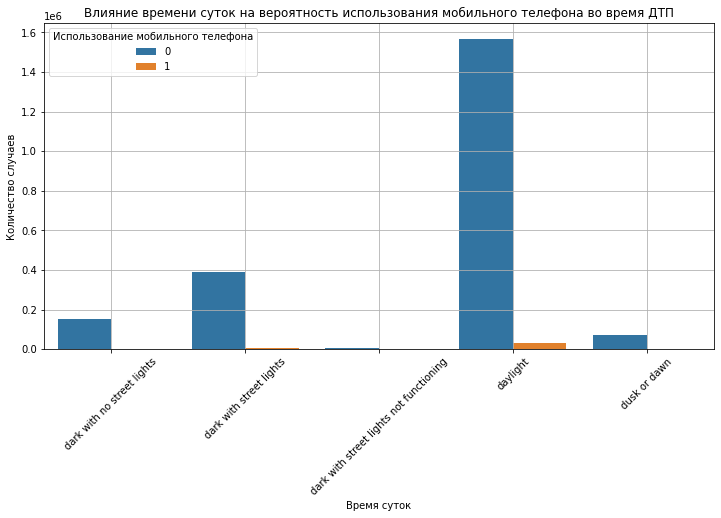

In [27]:
# Построение графика
plt.figure(figsize=(12, 6))
sns.barplot(data=lighting_cellphone_df, x='lighting', y='usage_count', hue='cellphone_in_use')
plt.title('Влияние времени суток на вероятность использования мобильного телефона во время ДТП')
plt.xlabel('Время суток')
plt.ylabel('Количество случаев')
plt.legend(title='Использование мобильного телефона')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### Выводы:

- Дневное время (daylight):\
Наибольшее количество ДТП происходит в дневное время как при использовании мобильного телефона (32,564 случаев), так и без его использования (1,568,381 случаев).
- Темнота с уличным освещением (dark with street lights):\
Второе по частоте время суток для ДТП, в том числе 8,361 случаев с использованием мобильного телефона и 388,722 случаев без использования.
- Темнота без уличного освещения (dark with no street lights):\
Значительное количество ДТП происходит без использования мобильного телефона (150,216 случаев) и меньшее количество с его использованием (3,073 случаев).
- Темнота с неработающим уличным освещением (dark with street lights not functioning):\
Меньшее количество ДТП, но использование мобильного телефона всё равно зафиксировано в 123 случаях.
- Сумерки (dusk or dawn):\
Меньшее количество ДТП в это время суток, но всё же 1,496 случаев с использованием мобильного телефона и 71,371 без использования.
- Отсутствие данных о времени суток (None):\
Небольшое количество ДТП происходит, когда данные о времени суток отсутствуют (208 случаев с использованием телефона, 9,878 без использования).

## Создайте модель для оценки водительского риска

Для начала необходимо создать выборку данных из базы, на которой мы будем обучать и проврять нашу модель.\
Мы попытаемся создать модель, предсказывающую таргет `at_fault` (наличие вины у участника ТП) - 1 или 0.

 Отбор характеристик:
 1. weather (Погодные условия):\
Погода является важным фактором риска ДТП, особенно в плохих погодных условиях. Прогноз погоды на время поездки поможет лучше оценить риск.
 2. collision_damage (Серьезность повреждений):\
Анализ серьёзности повреждений в предыдущих ДТП поможет определить, какие условия и факторы приводят к более серьёзным последствиям. Это может быть полезно для оценки риска при различных условиях движения.
 3. month (Месяц ДТП):\
Временной фактор, такой как месяц, может помочь выявить сезонные паттерны ДТП. Например, зимой или летом могут быть разные риски из-за погодных условий или изменений в поведении водителей.
 4. day (День ДТП):\
День недели может также быть значимым фактором, так как поведение водителей может меняться в зависимости от дня недели (рабочие дни, выходные и праздничные дни).
 5. hour (Час ДТП):\
Время суток важно учитывать, так как риск ДТП может варьироваться в зависимости от времени дня. Например, ночью и в часы пик риск ДТП может быть выше.
 6. control_device (Устройство управления):\
Состояние устройств управления может влиять на вероятность ДТП. Неисправные устройства могут увеличивать риск аварий.
 7. county_city_location (Географическое расположение):\
Географическое расположение ДТП может показать, в каких районах чаще происходят аварии. Это поможет понять, где находятся более опасные участки дорог.
 8. direction (Направление движения):\
 Направление движения может быть важным для анализа, так как некоторые направления могут быть более загружены или опасны, что увеличивает риск ДТП.
 9. intersection (Перекрёсток):\
 ДТП на перекрёстках могут быть более частыми или более серьёзными из-за сложности маневров. Учитывая этот фактор, можно лучше оценить риск ДТП.
 10. lighting (Освещение):\
Наличие и состояние уличного освещения могут значительно влиять на видимость и безопасность на дороге. Ночное время и плохое освещение могут повышать риск ДТП.
 11. location_type (Тип дороги):\
Тип дороги (шоссе, перекрёсток, раmpа и т.д.) может влиять на вероятность ДТП. Разные типы дорог могут иметь разные риски и особенности движения.
 12. road_condition (Состояние дороги):\
Состояние дороги (ямы, сыпучий материал, препятствия и т.д.) напрямую влияет на безопасность движения. Плохие дорожные условия увеличивают риск ДТП.
 13. road_surface (Состояние дорожного покрытия):\
Состояние дорожного покрытия (сухое, мокрое, заснеженное и т.д.) также влияет на сцепление и управляемость автомобиля, что важно учитывать при оценке риска.
 14. vehicle_age (Возраст автомобиля):\
Старые автомобили могут быть более подвержены поломкам и, следовательно, более опасны. Возраст автомобиля может быть важным фактором риска.
 15. vehicle_transmission (Тип КПП):\
Тип трансмиссии может влиять на управление автомобилем и его поведение в различных условиях. Это может быть важным фактором при оценке риска ДТП.
 16. vehicle_type (Тип кузова автомобиля):\
Разные типы автомобилей могут иметь разные риски. Например, минивэны и седаны могут иметь разные характеристики безопасности и маневренности.
 17. cellphone_in_use (Наличие громкой связи):\
Использование мобильного телефона во время вождения может значительно отвлекать водителя, увеличивая риск ДТП. Наличие громкой связи может снизить этот риск, поэтому важно учитывать этот фактор при оценке вероятности ДТП.
 18. insurance_premium (сумма страховки):\
Может положительно влиять на фактор аккутарности вождения. Например, если у водителя нет страховки или страховая сумма очень мала, возможно, он будет ездить аккуратнее.
 19. distance (дистанция до главной дороги в метрах): \
В совокпуности с другими переменными, характеризующими географическое положение автомобиля в момент аварии, дистанция до главной дорогидистанция до главной дороги может помочь модели уловаить взаимосвязь между местом и аварией.


### Предобработка данных

#### Отберем необходимые признаки для работы:

In [28]:
#parameters_query = '''
#SELECT     
#    c.case_id, 
#    p.at_fault,
#    p.insurance_premium,
#    EXTRACT(MONTH FROM c.collision_date)::int AS month,
#    EXTRACT(DAY FROM c.collision_date)::int AS day,
#    EXTRACT(HOUR FROM c.collision_time)::int AS hour,
#    c.control_device,
#    c.county_city_location,
#    c.direction,
#    c.distance,
#    c.intersection,
#    c.lighting,
#    c.location_type,
#    c.road_condition_1 AS road_condition,
#    c.road_surface,
#    v.vehicle_age,
#    v.vehicle_transmission,
#    v.vehicle_type,
#    p.cellphone_in_use,
#    c.weather_1 AS weather
#FROM parties AS p
#JOIN collisions AS c ON p.case_id = c.case_id
#JOIN vehicles AS v ON p.case_id = v.case_id AND p.party_number = v.party_number
#WHERE p.party_type = 'car'
#    AND EXTRACT(YEAR FROM c.collision_date)::int = 2012;
#'''

In [ ]:
parameters_query = '''
SELECT     
    c.case_id, 
    p.at_fault,
    p.insurance_premium,
    EXTRACT(MONTH FROM c.collision_date)::int AS month,
    EXTRACT(DAY FROM c.collision_date)::int AS day,
    EXTRACT(HOUR FROM c.collision_time)::int AS hour,
    c.control_device,
    c.county_city_location,
    c.direction,
    c.distance,
    c.intersection,
    c.lighting,
    c.location_type,
    c.road_condition_1 AS road_condition,
    c.road_surface,
    v.vehicle_age,
    v.vehicle_transmission,
    v.vehicle_type,
    p.cellphone_in_use,
    c.weather_1 AS weather
FROM parties AS p
JOIN collisions AS c ON p.case_id = c.case_id
JOIN vehicles AS v ON p.case_id = v.case_id AND p.party_number = v.party_number
WHERE p.party_type = 'car'
    AND EXTRACT(YEAR FROM c.collision_date)::int = 2012
    AND c.collision_damage != 'scratch';
'''

In [29]:
df = get_query(parameters_query)
display(df.sample(10))

,case_id,at_fault,insurance_premium,month,day,hour,control_device,county_city_location,direction,distance,intersection,lighting,location_type,road_condition,road_surface,vehicle_age,vehicle_transmission,vehicle_type,cellphone_in_use,weather
54914,5550646,1,31.0,3,22,9.0,none,1000,west,100.0,0.0,daylight,None,normal,dry,0.0,auto,sedan,0.0,cloudy
37331,5553937,1,43.0,4,1,16.0,none,1700,south,1056.0,0.0,daylight,highway,normal,dry,6.0,manual,coupe,0.0,clear
68529,5637949,0,32.0,6,1,9.0,none,3000,north,2000.0,0.0,daylight,highway,normal,dry,3.0,auto,sedan,0.0,cloudy
40189,5645933,0,44.0,4,27,8.0,functioning,3780,None,0.0,1.0,daylight,None,normal,dry,2.0,auto,sedan,0.0,cloudy
9881,5608985,0,31.0,4,27,23.0,functioning,3045,None,0.0,1.0,dark with street lights,ramp,normal,dry,4.0,auto,sedan,0.0,clear
23407,5543447,1,42.0,3,7,16.0,functioning,4806,east,44.0,0.0,daylight,None,normal,dry,2.0,manual,sedan,0.0,clear
18969,5543000,0,32.0,3,21,7.0,functioning,3400,None,0.0,1.0,daylight,None,normal,dry,4.0,auto,sedan,0.0,cloudy
23843,5636545,1,NaN,2,28,13.0,functioning,3600,None,0.0,1.0,daylight,None,normal,dry,5.0,manual,sedan,0.0,cloudy
33072,5619781,0,52.0,5,8,14.0,functioning,1942,None,0.0,1.0,daylight,None,normal,dry,8.0,manual,coupe,0.0,clear
67153,5564375,1,35.0,3,15,11.0,functioning,3404,east,36.0,0.0,daylight,None,normal,wet,5.0,manual,coupe,1.0,cloudy


In [30]:
%who

BinaryF1Score	 CatBoostClassifier	 ColumnTransformer	 ConfusionMatrixDisplay	 DatasetSizeTracker	 DecisionTreeClassifier	 Dense	 EarlyStopping	 GradientBoostingClassifier	 
GridSearchCV	 HeUniform	 KMeans	 LGBMClassifier	 LogisticRegression	 OneHotEncoder	 OrdinalEncoder	 Pipeline	 RandomForestClassifier	 
Sequential	 StandardScaler	 accuracy_score	 age_fault_df	 analyze_missing_values	 case_ids_df	 classification_report	 collisions_df	 collisions_monthly_df	 
confusion_matrix	 connection	 connection_string	 create_engine	 damage_road_surface_df	 dataframe_summary	 db_config	 df	 f1_score	 
get_query	 lighting_cellphone_df	 lighting_damage_df	 make_scorer	 missing_months	 mpl	 nn	 np	 parameters_query	 
parties_df	 pd	 phik	 plot_statistics_and_scatter	 plt	 precision_score	 query	 recall_score	 report	 
roc_auc_score	 sns	 sql_text	 tf	 torch	 tracker	 train_test_split	 vehicles_df	 weather_accident_df	 



In [31]:
del query, parties_df, collisions_df, vehicles_df, collisions_monthly_df, damage_road_surface_df, age_fault_df, weather_accident_df, lighting_damage_df, lighting_cellphone_df

In [32]:
interval_cols = ['insurance_premium', 'vehicle_age', 'distance']
dataframe_summary(df, 'Данные для модели', interval_cols)

Общая информация по таблице: Данные для модели
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103267 entries, 0 to 103266
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   case_id               103267 non-null  object 
 1   at_fault              103267 non-null  int64  
 2   insurance_premium     102471 non-null  float64
 3   month                 103267 non-null  int64  
 4   day                   103267 non-null  int64  
 5   hour                  103157 non-null  float64
 6   control_device        102791 non-null  object 
 7   county_city_location  103267 non-null  object 
 8   direction             75818 non-null   object 
 9   distance              103267 non-null  float64
 10  intersection          102918 non-null  float64
 11  lighting              102934 non-null  object 
 12  location_type         43323 non-null   object 
 13  road_condition        102722 non-null  object 
 14  road_

,count,mean,std,min,25%,50%,75%,max
insurance_premium,102471.0,38.699320,16.286041,0.0,25.0,36.0,50.0,105.0
vehicle_age,100606.0,5.217840,3.125412,0.0,3.0,5.0,7.0,161.0
distance,103267.0,696.619596,5522.375964,0.0,0.0,100.0,500.0,1584000.0



Случайные примеры:


,case_id,at_fault,insurance_premium,month,day,hour,control_device,county_city_location,direction,distance,intersection,lighting,location_type,road_condition,road_surface,vehicle_age,vehicle_transmission,vehicle_type,cellphone_in_use,weather
42867,5663247,1,42.0,5,24,12.0,none,4313,south,50.0,0.0,daylight,highway,normal,dry,6.0,auto,coupe,0.0,clear
55611,5461104,1,47.0,1,20,18.0,none,3100,south,400.0,0.0,dark with street lights,None,normal,wet,7.0,auto,coupe,0.0,cloudy
96779,5537742,0,56.0,2,15,17.0,functioning,3318,east,45.0,0.0,dark with street lights,None,normal,wet,NaN,manual,sedan,0.0,raining
1873,5644250,0,32.0,5,27,12.0,none,1900,south,100.0,0.0,daylight,highway,normal,dry,0.0,auto,sedan,0.0,clear
3148,5510083,1,80.0,1,29,16.0,none,1975,south,144.0,0.0,daylight,None,normal,dry,12.0,manual,coupe,0.0,clear



Количество строк и столбцов: (103267, 20)

Количество явных дубликатов: 35



In [33]:
df.drop_duplicates(inplace=True)

In [34]:
# После удаления явных дубликатов будем отслеживать изменения данных.
tracker = DatasetSizeTracker()

tracker.track(df)

{'Потери от исходного размера': 0,
 'Потери с предыдущего раза': 0,
 'Общие потери в процентах': 0}

Пропуски в датафрейме Данных для модели:
                      Total    Percent
location_type         59924  58.047892
direction             27439  26.579936
cellphone_in_use       9997   9.684013
vehicle_age            2660   2.576720
vehicle_transmission   1956   1.894761
insurance_premium       796   0.771079
road_surface            783   0.758486
road_condition          545   0.527937
control_device          476   0.461097
intersection            349   0.338073
lighting                333   0.322574
weather                 305   0.295451
hour                    110   0.106556



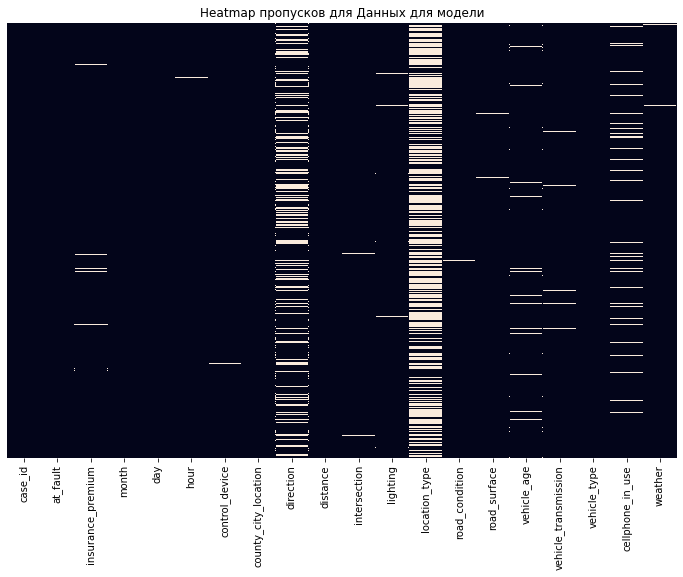

In [35]:
analyze_missing_values(df, 'Данных для модели')

Вывод:
* Данные содержат пропуски;
* В данных есть явные дубликаты;
* У некоторых данных неправильный формат;
* Необходимо проверить значения в категореальных переменных;
* В числовых переменных есть аномальные значения (машина возрастом в 161 год), тоже необходимо проверить.

#### Обработка числовых значений.

В наших данных всего 3 числовых характеристики: `insurance_premium, vehicle_age, distance`. \
В этих данных отсутсвуют пропуски.

In [36]:
# df['vehicle_age'] = df['vehicle_age'].astype(int)

Построим графики распределения числовых переменных, посмотрим, как таргет-признак влияет на распределение.\
Для начала подготовим оттедльную выгрузку очищенную от вбросов

In [37]:
df_1 = df[['insurance_premium', 'vehicle_age', 'distance', 'at_fault']]
df_1 = df_1[df_1['distance'] < 1000]
df_1 = df_1[df_1['vehicle_age'] < 20]

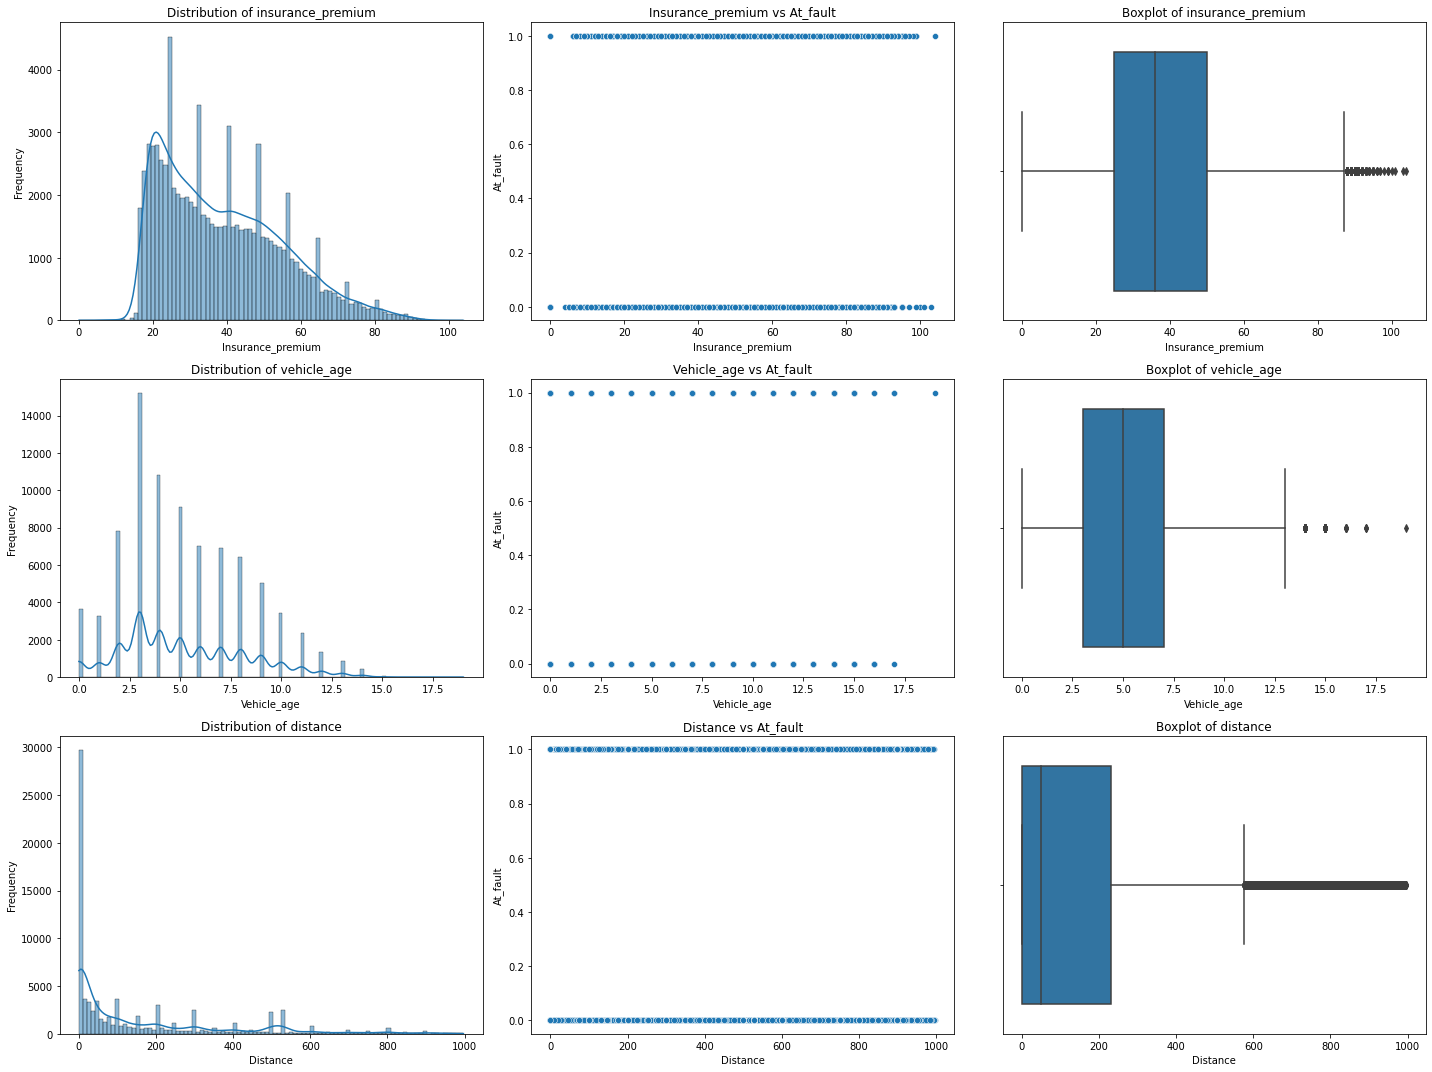

In [38]:
target_col = 'at_fault'
plot_statistics_and_scatter(df_1, interval_cols, target_col)

In [39]:
print("\n Статистическое описание:")
display(df_1[interval_cols].describe().transpose())


 Статистическое описание:


,count,mean,std,min,25%,50%,75%,max
insurance_premium,83118.0,38.789612,16.334931,0.0,25.0,36.0,50.0,104.0
vehicle_age,83663.0,5.197698,3.069634,0.0,3.0,5.0,7.0,19.0
distance,83663.0,155.033015,212.248747,0.0,0.0,50.0,230.0,997.0


Вывод:
* Для борьбы с выбросами будет лучше всего категорезировать данные о дистанции и страховке. 
* Разобъем данные на группы с помощью метода KNN.
* В vehicle_age и distance все значения выше определенного порога приравняем к этому верхнему значению.

#### Кластеризация и категоризация данных

Кластеризация помогает выявить скрытые структуры и закономерности в данных. Разбивая значения insurance_premium и distance на категории, мы можем лучше понять, как эти признаки распределены и какие группы значений наиболее часто встречаются.

* Преобразование непрерывных переменных в категориальные может повысить точность модели. Это связано с тем, что модели могут легче справляться с категориальными признаками, особенно когда в данных есть нелинейные зависимости и аномальные распределения. Кластеризация позволяет сгруппировать данные в соответствии с их внутренними закономерностями, что упрощает задачи классификации и регрессии.

* Кластеризация помогает сгладить влияние выбросов и шумов в данных. В значениях insurance_premium и distance могут быть аномалии, которые сильно отличаются от других значений. Кластеризация группирует данные таким образом, что эти выбросы оказывают меньшее влияние на обучение модели.

* Разделение данных на категории делает результаты модели более интерпретируемыми. В бизнес-контексте легче объяснить, что модель делает предсказания на основе категорий, таких как "низкая", "средняя" и "высокая" стоимость страховки или расстояния, чем работать с непрерывными значениями.

**Почему выбрали метод K-Means для кластеризации**

* K-Means является одним из самых простых и популярных методов кластеризации.\
Он легко реализуется и быстро работает на больших наборах данных.

* K-Means хорошо подходит для выявления естественных кластеров в данных. \
Он минимизирует внутрикластерное рассеяние, что позволяет сгруппировать данные в компактные и хорошо отделенные кластеры.

* K-Means масштабируется на больших объемах данных и может эффективно работать с миллионами точек данных.\

* Результаты кластеризации K-Means легко интерпретировать. \
Каждый кластер представляет собой группу точек данных, которые близки друг к другу в многомерном пространстве признаков.

In [40]:
df['insurance_premium'].fillna(df['insurance_premium'].median(), inplace=True)
df['vehicle_age'].fillna(df['vehicle_age'].median(), inplace=True)

# Приведение столбцов к целочисленному типу
df['insurance_premium'] = df['insurance_premium'].astype(int)
df['vehicle_age'] = df['vehicle_age'].astype(int)
df['distance'] = df['distance'].astype(int)

In [41]:
tracker.track(df)

{'Потери от исходного размера': 0,
 'Потери с предыдущего раза': 0,
 'Общие потери в процентах': 0.0}

Пропуски в датафрейме Данных для модели:
                      Total    Percent
location_type         59924  58.047892
direction             27439  26.579936
cellphone_in_use       9997   9.684013
vehicle_transmission   1956   1.894761
road_surface            783   0.758486
road_condition          545   0.527937
control_device          476   0.461097
intersection            349   0.338073
lighting                333   0.322574
weather                 305   0.295451
hour                    110   0.106556



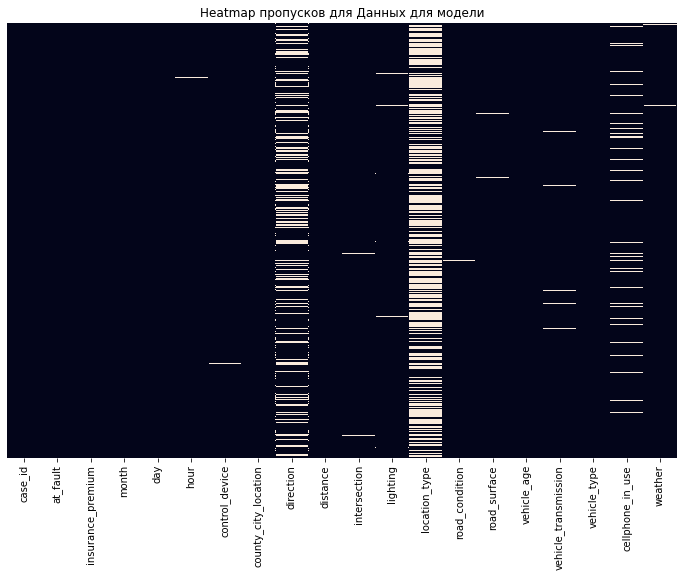

In [42]:
analyze_missing_values(df, 'Данных для модели')

In [43]:
df.loc[df['distance'] > 1000, 'distance'] = 1000
df.loc[df['vehicle_age'] > 20, 'vehicle_age'] = 20

In [44]:
display(df.loc[df['vehicle_age'] == 20].sample(2))

,case_id,at_fault,insurance_premium,month,day,hour,control_device,county_city_location,direction,distance,intersection,lighting,location_type,road_condition,road_surface,vehicle_age,vehicle_transmission,vehicle_type,cellphone_in_use,weather
19490,5639033,0,22,12,5,5.0,functioning,1942,None,0,1.0,dusk or dawn,ramp,normal,dry,20,manual,sedan,0.0,clear
78805,5542342,1,18,6,20,11.0,none,1942,north,449,0.0,daylight,None,normal,dry,20,manual,sedan,0.0,clear


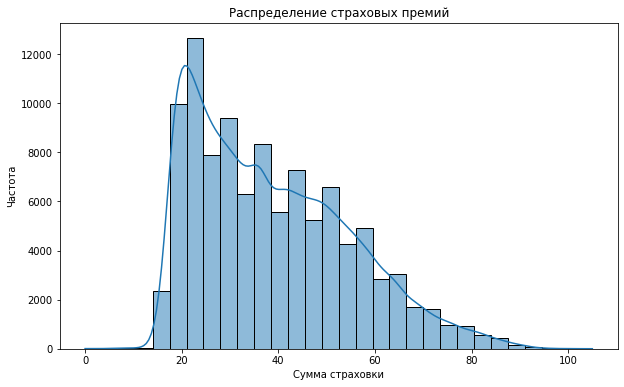

In [45]:
# Построение гистограммы
plt.figure(figsize=(10, 6))
sns.histplot(df['insurance_premium'], bins=30, kde=True)
plt.title('Распределение страховых премий')
plt.xlabel('Сумма страховки')
plt.ylabel('Частота')
plt.show()

In [46]:
df['vehicle_age'].unique()

array([ 3,  0, 10,  2,  4,  5, 13,  7,  1,  6,  9, 11,  8, 12, 14, 16, 15,
       17, 20, 19])

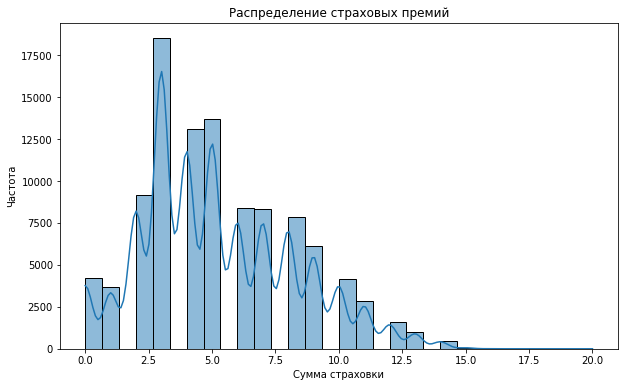

In [47]:
# Построение гистограммы
plt.figure(figsize=(10, 6))
sns.histplot(df['vehicle_age'], bins=30, kde=True)
plt.title('Распределение страховых премий')
plt.xlabel('Сумма страховки')
plt.ylabel('Частота')
plt.show()

In [48]:
# Подготовка данных для кластеризации
insurance_premium = df['insurance_premium'].values.reshape(-1, 1)
# Применение KMeans для определения 4 категорий (эконом, обычная, дорогая ипремиум)
kmeans = KMeans(n_clusters=4, n_init=10, random_state=0).fit(insurance_premium)

# Добавление категорий в DataFrame с использованием .loc
df.loc[:, 'insurance_category'] = kmeans.labels_

# Определение порядка кластеров по среднему значению страховых премий
cluster_order = df.groupby('insurance_category')['insurance_premium'].mean().sort_values().index
cluster_mapping = {old_label: new_label for new_label, old_label in enumerate(cluster_order)}

# Переназначение меток кластеров
df['insurance_category'] = df['insurance_category'].map(cluster_mapping)

In [49]:
df.sample()

,case_id,at_fault,insurance_premium,month,day,hour,control_device,county_city_location,direction,distance,...,lighting,location_type,road_condition,road_surface,vehicle_age,vehicle_transmission,vehicle_type,cellphone_in_use,weather,insurance_category
47438,5539569,1,18,3,24,23.0,none,5400,south,1000,...,dark with no street lights,highway,normal,dry,2,manual,coupe,0.0,clear,0


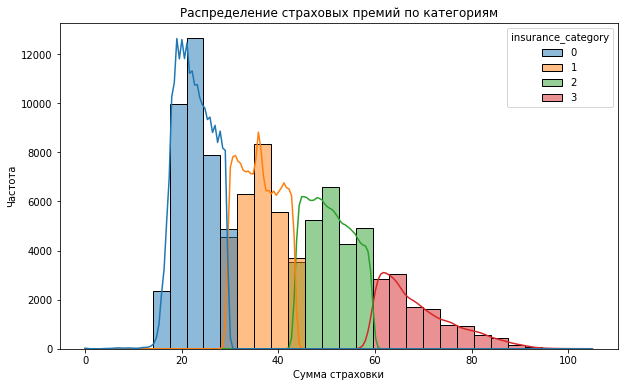

In [50]:
# Построение гистограммы с категориями
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='insurance_premium', hue='insurance_category', bins=30, kde=True, palette="tab10")
plt.title('Распределение страховых премий по категориям')
plt.xlabel('Сумма страховки')
plt.ylabel('Частота')
plt.show()

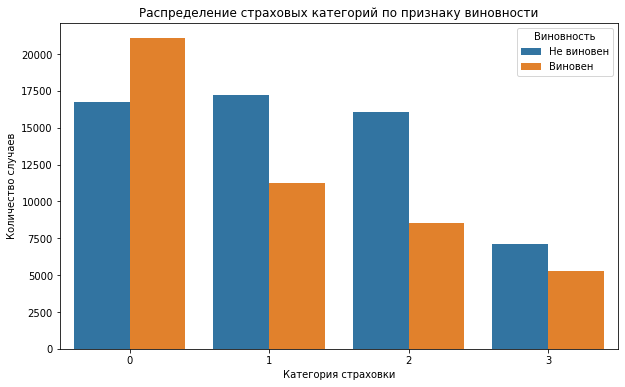

In [51]:
# Построение графика распределения insurance_category по признаку at_fault
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='insurance_category', hue='at_fault', palette="tab10")
plt.title('Распределение страховых категорий по признаку виновности')
plt.xlabel('Категория страховки')
plt.ylabel('Количество случаев')
plt.legend(title='Виновность', labels=['Не виновен', 'Виновен'])
plt.show()

In [52]:
# Подготовка данных для кластеризации
insurance_premium = df['distance'].values.reshape(-1, 1)
# Применение KMeans для определения 4 категорий (эконом, обычная, дорогая ипремиум)
kmeans = KMeans(n_clusters=4, n_init=10, random_state=0).fit(insurance_premium)

# Добавление категорий в DataFrame с использованием .loc
df.loc[:, 'distance_category'] = kmeans.labels_

# Определение порядка кластеров по среднему значению страховых премий
cluster_order = df.groupby('distance_category')['distance'].mean().sort_values().index
cluster_mapping = {old_label: new_label for new_label, old_label in enumerate(cluster_order)}

# Переназначение меток кластеров
df['distance_category'] = df['distance_category'].map(cluster_mapping)

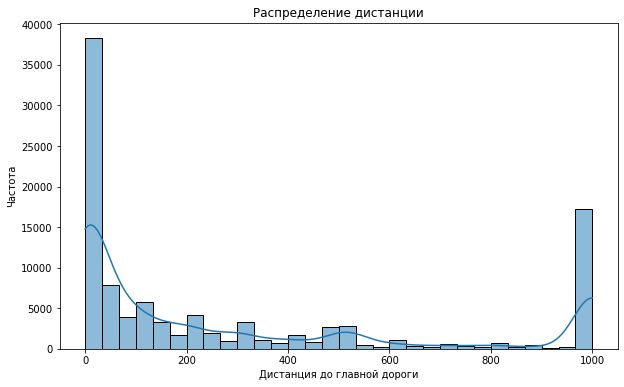

In [53]:
# Построение гистограммы
plt.figure(figsize=(10, 6))
sns.histplot(df['distance'], bins=30, kde=True)
plt.title('Распределение дистанции')
plt.xlabel('Дистанция до главной дороги')
plt.ylabel('Частота')
plt.show()

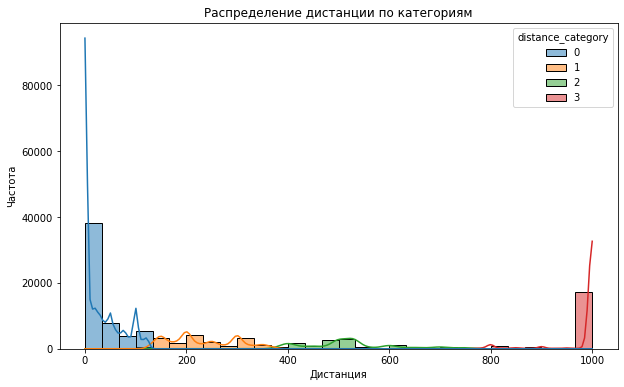

In [54]:
# Построение гистограммы с категориями
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='distance', hue='distance_category', bins=30, kde=True, palette="tab10")
plt.title('Распределение дистанции по категориям')
plt.xlabel('Дистанция')
plt.ylabel('Частота')
plt.show()

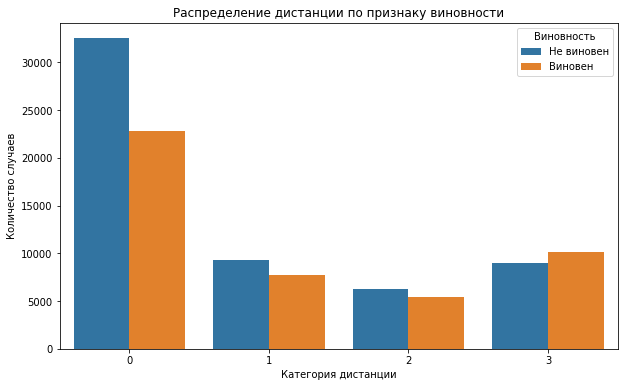

In [55]:
# Построение графика распределения insurance_category по признаку at_fault
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='distance_category', hue='at_fault', palette="tab10")
plt.title('Распределение дистанции по признаку виновности')
plt.xlabel('Категория дистанции')
plt.ylabel('Количество случаев')
plt.legend(title='Виновность', labels=['Не виновен', 'Виновен'])
plt.show()

Вывод:

* Провели анализ и обработку колличественных переменных.
* Избавились от пропусков в vehicle_age и distance.
* Категорезировали для борьбы с выбросами vekicle_age и distancе, создали insurance_category и distancе_category.
* Привели данные к целочисленному формату.

In [56]:
df.drop(['insurance_premium', 'distance'], axis=1, inplace=True)

#### Обработка категориальных значений. 

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103232 entries, 0 to 103266
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   case_id               103232 non-null  object 
 1   at_fault              103232 non-null  int64  
 2   month                 103232 non-null  int64  
 3   day                   103232 non-null  int64  
 4   hour                  103122 non-null  float64
 5   control_device        102756 non-null  object 
 6   county_city_location  103232 non-null  object 
 7   direction             75793 non-null   object 
 8   intersection          102883 non-null  float64
 9   lighting              102899 non-null  object 
 10  location_type         43308 non-null   object 
 11  road_condition        102687 non-null  object 
 12  road_surface          102449 non-null  object 
 13  vehicle_age           103232 non-null  int64  
 14  vehicle_transmission  101276 non-null  object 
 15  

In [58]:
df.columns

Index(['case_id', 'at_fault', 'month', 'day', 'hour', 'control_device',
       'county_city_location', 'direction', 'intersection', 'lighting',
       'location_type', 'road_condition', 'road_surface', 'vehicle_age',
       'vehicle_transmission', 'vehicle_type', 'cellphone_in_use', 'weather',
       'insurance_category', 'distance_category'],
      dtype='object')

In [59]:
df.sample()

,case_id,at_fault,month,day,hour,control_device,county_city_location,direction,intersection,lighting,location_type,road_condition,road_surface,vehicle_age,vehicle_transmission,vehicle_type,cellphone_in_use,weather,insurance_category,distance_category
71613,5533435,1,3,4,17.0,functioning,1942,south,0.0,dusk or dawn,None,normal,dry,6,manual,coupe,0.0,clear,1,0


In [60]:
df.county_city_location.unique()

array(['3010', '3700', '1967', '3711', '3029', '3017', '4806', '1942',
       '3900', '4200', '5604', '3101', '3001', '1955', '1922', '3710',
       '1972', '5000', '2706', '3341', '3400', '3702', '1928', '2802',
       '1200', '3019', '1900', '1906', '0103', '1602', '1949', '1907',
       '1929', '1992', '1500', '4311', '3404', '1973', '3394', '3318',
       '3300', '1920', '5600', '3450', '3018', '3605', '1968', '3801',
       '4117', '3105', '5608', '3009', '1941', '4100', '1990', '1926',
       '3616', '4313', '3308', '0109', '3619', '5609', '2109', '3610',
       '2000', '5701', '1000', '3712', '3640', '4118', '0734', '3313',
       '0900', '5800', '2300', '3706', '3713', '3604', '1953', '3028',
       '0708', '3024', '1971', '3015', '3600', '3906', '1959', '4807',
       '4116', '4114', '4204', '1903', '2406', '0104', '1001', '5002',
       '4300', '3025', '5607', '3315', '4000', '4316', '4400', '1944',
       '4113', '4312', '0113', '1934', '1909', '5400', '0112', '1948',
      

* Избавимся от пропусков и неккоректных значений в столбцах.

Пропуски в датафрейме Данных для модели:
                      Total    Percent
location_type         59924  58.047892
direction             27439  26.579936
cellphone_in_use       9997   9.684013
vehicle_transmission   1956   1.894761
road_surface            783   0.758486
road_condition          545   0.527937
control_device          476   0.461097
intersection            349   0.338073
lighting                333   0.322574
weather                 305   0.295451
hour                    110   0.106556



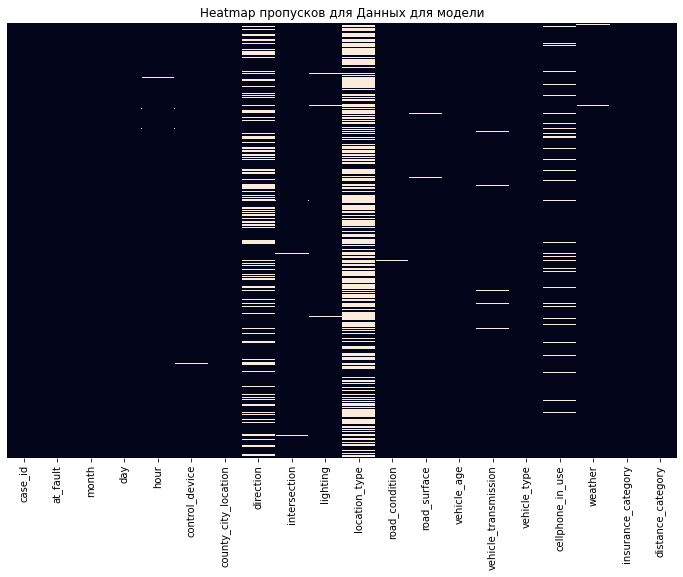

In [61]:
analyze_missing_values(df, 'Данных для модели')

Удалим строки с пропусками в: 'road_surface', 'road_condition', 'control_device', 'weather', 'intersection', 'lighting', 'hour'.

In [62]:
# Удаление строк с пропущенными значениями в указанных столбцах
df.dropna(subset=['road_surface', 'road_condition', 'control_device', 'weather', 'intersection', 'lighting', 'hour'], inplace=True)


In [63]:
tracker.track(df)

{'Потери от исходного размера': 2337,
 'Потери с предыдущего раза': 2337,
 'Общие потери в процентах': 2.2638329200247984}

Потери не превышают 2%, что приемлемо.

Пропущенные значения в location_type и direction заменим на категорию "unknown"

In [64]:
df['location_type'].fillna('unknown', inplace=True)
df['direction'].fillna('unknown', inplace=True)

Пропуски в cellphone_in_use заменим на бОлшую категорию.

In [65]:
df.cellphone_in_use.value_counts()

0.0    89583
1.0     1879
Name: cellphone_in_use, dtype: int64

In [66]:
df['cellphone_in_use'].fillna(0, inplace=True)
df['cellphone_in_use'] = df['cellphone_in_use'].astype(int)

vehicle_transmission - сделаем факторным признаком is_auto:
* manual - 0
* auto - 1

In [67]:
# Замена значений в столбце vehicle_transmission на факторные признаки
df['is_auto'] = df['vehicle_transmission'].map({'manual': 0, 'auto': 1})
df.dropna(subset=['vehicle_transmission'], inplace=True)
df['is_auto'] = df['is_auto'].astype(int)

In [68]:
df.is_auto.value_counts()

1    51114
0    47920
Name: is_auto, dtype: int64

In [69]:
tracker.track(df)

{'Потери от исходного размера': 4198,
 'Потери с предыдущего раза': 1861,
 'Общие потери в процентах': 4.066568505889647}

Вывод: 
* Обработали категориальные признаки.
* Избавились от пропусков. 
* Сделали переменную факторной.

### Исследуем данные

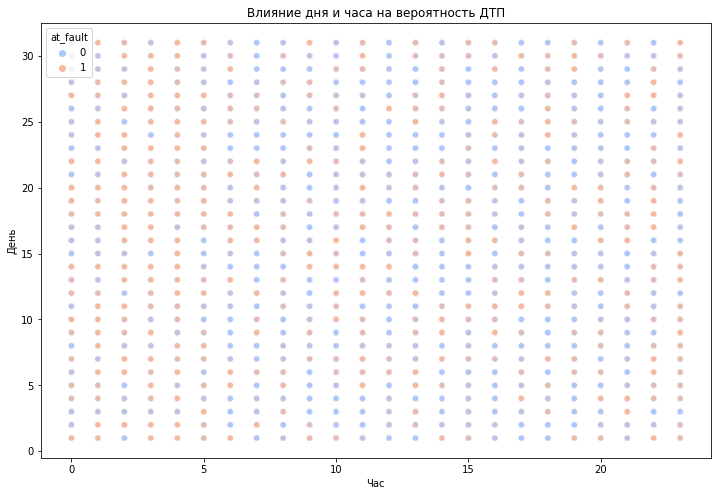

In [70]:
# График разброса для дня и часа, раскрашенный по таргет-признаку
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='hour', y='day', hue='at_fault', palette='coolwarm', alpha=0.7)
plt.title('Влияние дня и часа на вероятность ДТП')
plt.xlabel('Час')
plt.ylabel('День')
plt.show()

* Этот график показывает количество аварий по каждому району и разделение по виновности (at_fault).

* Район 4500 имеет наибольшее количество аварий, где большая часть случаев виновности.
* Район 2300 также показывает высокий уровень аварий с заметной долей виновных случаев.
* Районы 1700 и 3200 показывают высокий уровень аварий с преобладанием виновных случаев.

In [71]:
# Подсчет количества 1 и 0 в каждом районе
fault_counts = df.groupby('county_city_location')['at_fault'].value_counts().unstack().fillna(0)
fault_counts.columns = ['not_at_fault', 'at_fault']

# Вычисление соотношения 1 к общему количеству случаев
fault_counts['total'] = fault_counts['not_at_fault'] + fault_counts['at_fault']
fault_counts['fault_ratio'] = fault_counts['at_fault'] / fault_counts['total']

# Отсортировать районы по соотношению в убывающем порядке и выбрать топ-10
top_dangerous_counties = fault_counts.sort_values(by='fault_ratio', ascending=False).index

# Создание среза данных только для топ-10 районов
df_top_dangerous_counties = df[df['county_city_location'].isin(top_dangerous_counties)]

# Вывод результатов для проверки
display(fault_counts.head(10))
display(df_top_dangerous_counties.head())

,not_at_fault,at_fault,total,fault_ratio
county_city_location,,,,
0100,288.0,280.0,568.0,0.492958
0101,51.0,45.0,96.0,0.468750
0102,18.0,10.0,28.0,0.357143
0103,140.0,81.0,221.0,0.366516
0104,53.0,39.0,92.0,0.423913
0105,221.0,166.0,387.0,0.428941
0106,161.0,120.0,281.0,0.427046
0107,115.0,82.0,197.0,0.416244
0108,42.0,32.0,74.0,0.432432


,case_id,at_fault,month,day,hour,control_device,county_city_location,direction,intersection,lighting,...,road_condition,road_surface,vehicle_age,vehicle_transmission,vehicle_type,cellphone_in_use,weather,insurance_category,distance_category,is_auto
0,5599713,1,4,17,17.0,none,3010,east,0.0,daylight,...,normal,dry,3,auto,sedan,0,clear,0,0,1
1,5454403,0,1,20,8.0,none,3700,north,0.0,daylight,...,normal,dry,0,manual,sedan,0,clear,0,1,0
2,5454417,0,1,27,13.0,functioning,1967,east,0.0,daylight,...,normal,dry,10,manual,sedan,0,clear,0,1,0
3,5454438,1,1,30,15.0,none,3711,north,0.0,daylight,...,normal,dry,2,manual,sedan,0,clear,3,0,0
4,5600911,0,4,25,18.0,functioning,3029,unknown,1.0,daylight,...,normal,dry,2,auto,sedan,0,clear,0,0,1


In [72]:
# Фильтрация районов, где общее количество случаев больше 15
fault_counts = fault_counts[(fault_counts['total'] > 15) & (fault_counts['fault_ratio'] > 0.64)]

In [73]:
fault_counts.sort_values(by='fault_ratio', ascending=False)

,not_at_fault,at_fault,total,fault_ratio
county_city_location,,,,
4600,2.0,18.0,20.0,0.900000
3200,5.0,43.0,48.0,0.895833
2200,14.0,48.0,62.0,0.774194
1100,11.0,36.0,47.0,0.765957
5300,10.0,31.0,41.0,0.756098
1400,19.0,58.0,77.0,0.753247
4700,24.0,66.0,90.0,0.733333
4500,61.0,166.0,227.0,0.731278
2300,67.0,171.0,238.0,0.718487


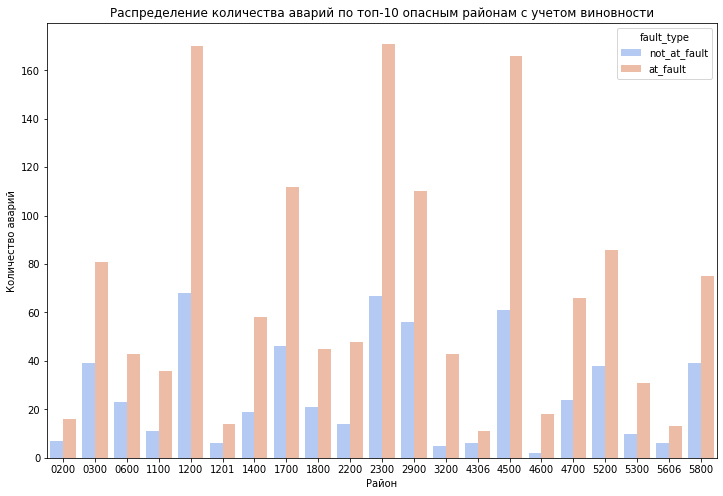

In [74]:
# Создание DataFrame для графика
fault_counts_2 = fault_counts.reset_index().rename(columns={'index': 'county_city_location'})
# Преобразование данных для построения графика
fault_counts_melted = fault_counts_2.melt(id_vars='county_city_location', value_vars=['not_at_fault', 'at_fault'], 
                                        var_name='fault_type', value_name='count')

# Построение графика
plt.figure(figsize=(12, 8))
sns.barplot(x='county_city_location', y='count', hue='fault_type', data=fault_counts_melted, palette='coolwarm')
plt.title('Распределение количества аварий по топ-10 опасным районам с учетом виновности')
plt.xlabel('Район')
plt.ylabel('Количество аварий')
plt.show()

* Этот график показывает распределение аварий по районам и времени суток.

* В районе 4500, аварии чаще происходят вечером и ночью.
* В районах 2300 и 1700 наблюдаются аварии во все время суток, но с пиками в определенные часы.
* В других районах аварии распределены более равномерно по времени суток.

In [75]:
fault_counts_2

,county_city_location,not_at_fault,at_fault,total,fault_ratio
0,0200,7.0,16.0,23.0,0.695652
1,0300,39.0,81.0,120.0,0.675000
2,0600,23.0,43.0,66.0,0.651515
3,1100,11.0,36.0,47.0,0.765957
4,1200,68.0,170.0,238.0,0.714286
5,1201,6.0,14.0,20.0,0.700000
6,1400,19.0,58.0,77.0,0.753247
7,1700,46.0,112.0,158.0,0.708861
8,1800,21.0,45.0,66.0,0.681818
9,2200,14.0,48.0,62.0,0.774194


In [76]:
# Отбор данных для указанных районов
selected_counties = ['0200', '0300', '1100', '1201', '1400', '1700', '2200', '2300', '3200', '4111', '4500', '4600', '5300']
df_selected = df[df['county_city_location'].isin(selected_counties)]

# Вывод первых строк отобранного DataFrame
display(df_selected.head())


,case_id,at_fault,month,day,hour,control_device,county_city_location,direction,intersection,lighting,...,road_condition,road_surface,vehicle_age,vehicle_transmission,vehicle_type,cellphone_in_use,weather,insurance_category,distance_category,is_auto
117,5465299,0,1,8,9.0,functioning,2300,unknown,1.0,daylight,...,normal,dry,9,auto,sedan,0,clear,3,0,1
190,5494506,1,1,22,13.0,none,2300,unknown,1.0,daylight,...,normal,wet,2,manual,sedan,0,raining,0,0,0
347,5521216,1,3,18,19.0,none,2200,west,0.0,dark with no street lights,...,normal,wet,3,manual,sedan,0,cloudy,0,1,0
452,5544742,0,4,5,16.0,none,5300,east,0.0,daylight,...,other,snowy,5,auto,sedan,0,snowing,1,3,1
483,5549609,0,3,29,1.0,none,3200,west,0.0,dark with street lights,...,normal,dry,5,manual,sedan,0,clear,2,2,0


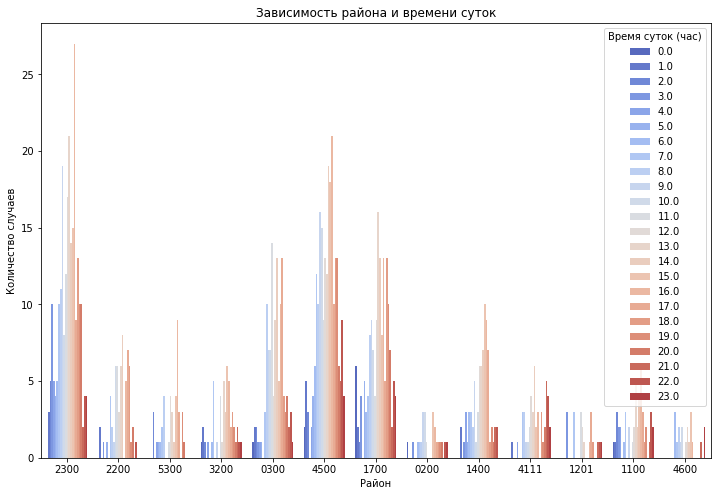

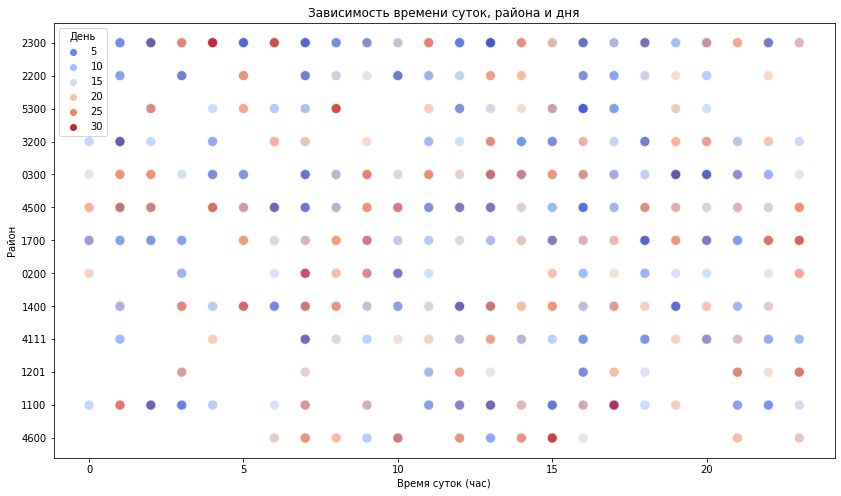

In [77]:
# Построение графика зависимости района и времени суток
plt.figure(figsize=(12, 8))
sns.countplot(data=df_selected, x='county_city_location', hue='hour', palette='coolwarm')
plt.title('Зависимость района и времени суток')
plt.xlabel('Район')
plt.ylabel('Количество случаев')
plt.legend(title='Время суток (час)')
plt.show()

# Построение графика зависимости времени суток, района и дня
plt.figure(figsize=(14, 8))
sns.scatterplot(data=df_selected, x='hour', y='county_city_location', hue='day', palette='coolwarm', s=100, alpha=0.7)
plt.title('Зависимость времени суток, района и дня')
plt.xlabel('Время суток (час)')
plt.ylabel('Район')
plt.legend(title='День')
plt.show()

* В разных днях и часах наблюдается равномерное распределение виновных и невиновных случаев.
* Можно заметить, что в некоторые дни больше аварий происходят в утренние и вечерние часы.
* Район 4500 имеет значительное количество аварий в вечерние и ночные часы, особенно в начале и конце месяца.
* В районах 2300 и 1700 аварии распределены по времени суток и дням месяца.
* В других районах наблюдается распределение аварий по разным времени суток и дням месяца, но менее выраженное.

* Районы 4500, 2300, и 1700 являются наиболее опасными с точки зрения количества аварий и их виновности.
* варии чаще происходят вечером и ночью, особенно в самых опасных районах.
* Временные паттерны (день и час) также влияют на вероятность ДТП, с пиками в определенные часы и дни месяца.

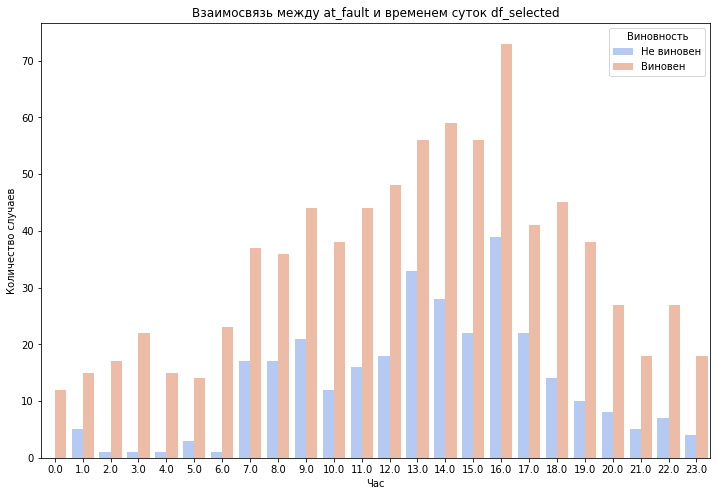

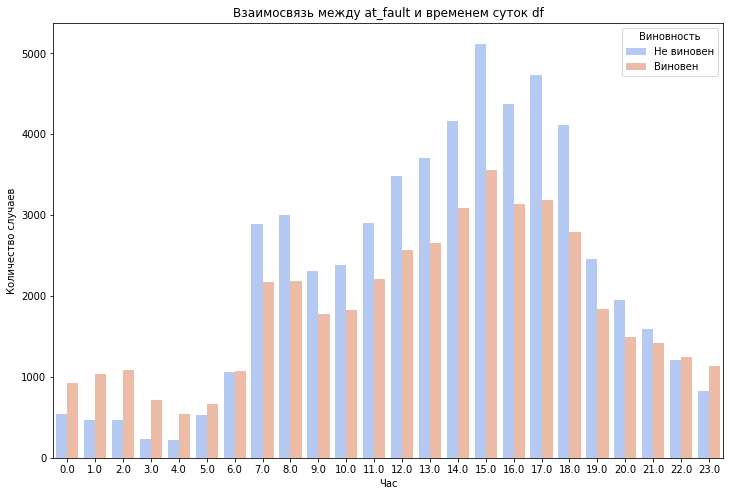

In [78]:
# Построение графика зависимости между at_fault и hour
plt.figure(figsize=(12, 8))
sns.countplot(data=df_selected, x='hour', hue='at_fault', palette='coolwarm')
plt.title('Взаимосвязь между at_fault и временем суток df_selected')
plt.xlabel('Час')
plt.ylabel('Количество случаев')
plt.legend(title='Виновность', labels=['Не виновен', 'Виновен'])
plt.show()
# Построение графика зависимости между at_fault и hour
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='hour', hue='at_fault', palette='coolwarm')
plt.title('Взаимосвязь между at_fault и временем суток df')
plt.xlabel('Час')
plt.ylabel('Количество случаев')
plt.legend(title='Виновность', labels=['Не виновен', 'Виновен'])
plt.show()

* График 1: Взаимосвязь между at_fault и временем суток для df_selected \
Этот график показывает распределение аварий по часам суток для отобранных районов (df_selected), разделяя их на виновных и невиновных участников.

  * Утренние часы (6:00 - 9:00): В эти часы наблюдается значительное количество аварий, причем количество виновных участников (1) превышает количество невиновных (0).
  * Дневные часы (12:00 - 16:00): Здесь также наблюдается высокий уровень аварий, и количество виновных участников заметно превышает количество невиновных.
  * Вечерние часы (16:00 - 20:00): В эти часы количество аварий начинает снижаться, но всё ещё значительное число аварий с преобладанием виновных участников.
  * Ночные часы (20:00 - 6:00): В эти часы наблюдается меньше аварий, но количество виновных все еще превышает количество невиновных.
* График 2: Взаимосвязь между at_fault и временем суток для всей выборки (df)
Этот график показывает распределение аварий по часам суток для всей выборки данных (df), также разделяя их на виновных и невиновных участников.

  * Утренние часы (6:00 - 9:00): Здесь количество невиновных участников (0) превышает количество виновных (1), что отличается от наблюдений в отобранных районах.
  * Дневные часы (12:00 - 16:00): В эти часы количество невиновных также превышает количество виновных, что указывает на более безопасные условия в эти часы.
  * Вечерние часы (16:00 - 20:00): Вечером количество аварий постепенно уменьшается, и количество виновных и невиновных становится более сбалансированным.
  * Ночные часы (20:00 - 6:00): В ночное время наблюдается меньше аварий, но тенденция с преобладанием невиновных сохраняется.

Выводы:
* Для отобранных районов (df_selected):

  * Утренние и дневные часы характеризуются высоким уровнем аварий, с преобладанием виновных участников.
  * Вечерние и ночные часы показывают уменьшение количества аварий, но всё ещё заметное число виновных участников.
* Для всей выборки (df):

  * Утренние и дневные часы демонстрируют высокий уровень аварий, но с преобладанием невиновных участников.
  * Вечером и ночью количество аварий уменьшается, с более сбалансированным распределением виновных и невиновных участников.
  * Эти различия могут указывать на специфические риски в определенных районах и в определенное время суток, что важно учитывать при разработке системы предупреждения ДТП. В целом, данные показывают, что время суток существенно влияет на вероятность аварий, особенно в утренние и дневные часы.

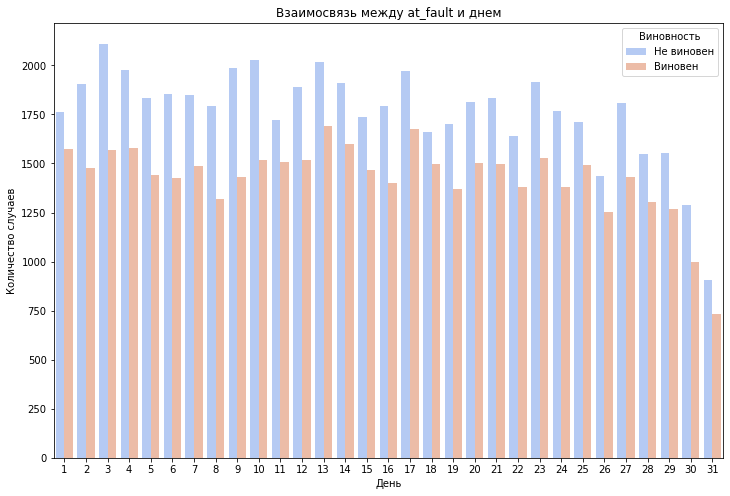

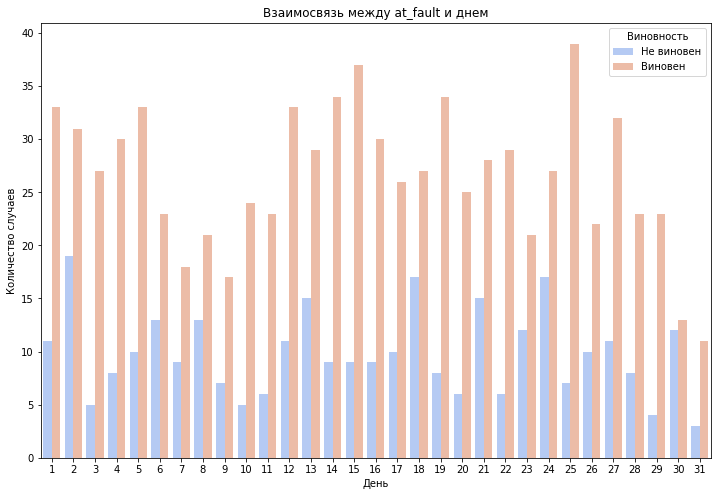

In [79]:
# Построение графика зависимости между at_fault и day
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='day', hue='at_fault', palette='coolwarm')
plt.title('Взаимосвязь между at_fault и днем')
plt.xlabel('День')
plt.ylabel('Количество случаев')
plt.legend(title='Виновность', labels=['Не виновен', 'Виновен'])
plt.show()
# Построение графика зависимости между at_fault и day
plt.figure(figsize=(12, 8))
sns.countplot(data=df_selected, x='day', hue='at_fault', palette='coolwarm')
plt.title('Взаимосвязь между at_fault и днем')
plt.xlabel('День')
plt.ylabel('Количество случаев')
plt.legend(title='Виновность', labels=['Не виновен', 'Виновен'])
plt.show()

#### График 1: Взаимосвязь между `at_fault` и днем для всей выборки (`df`)


- **Общая картина:** Количество аварий относительно равномерно распределено по дням месяца.
- **Виновные участники:** Количество виновных участников ниже, чем количество невиновных.
- **Невиновные участники:** Количество невиновных участников превышает количество виновных.

#### График 2: Взаимосвязь между `at_fault` и днем для отобранных районов (`df_selected`)

- **Общая картина:** Количество аварий значительно варьируется по дням месяца.
- **Виновные участники:** Количество виновных участников заметно превышает количество невиновных почти во все дни.
- **Невиновные участники:** Количество невиновных участников значительно ниже, что указывает на более высокий риск аварий с виновными участниками в отобранных районах.

### Общие выводы

Анализ показывает, что в отобранных районах наблюдается более высокий уровень аварий с виновными участниками, по сравнению с общей выборкой данных. Это может указывать на более высокие риски в этих районах, что требует дополнительного внимания и мер по снижению аварийности. Временные паттерны также показывают, что определенные часы и дни могут быть более опасными, что полезно учитывать при разработке стратегии предупреждения ДТП.







### Проведем финальную предобработку данных.

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99034 entries, 0 to 103266
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   case_id               99034 non-null  object 
 1   at_fault              99034 non-null  int64  
 2   month                 99034 non-null  int64  
 3   day                   99034 non-null  int64  
 4   hour                  99034 non-null  float64
 5   control_device        99034 non-null  object 
 6   county_city_location  99034 non-null  object 
 7   direction             99034 non-null  object 
 8   intersection          99034 non-null  float64
 9   lighting              99034 non-null  object 
 10  location_type         99034 non-null  object 
 11  road_condition        99034 non-null  object 
 12  road_surface          99034 non-null  object 
 13  vehicle_age           99034 non-null  int64  
 14  vehicle_transmission  99034 non-null  object 
 15  vehicle_type      

In [81]:
# Преобразование столбцов с типом данных float в int
df['hour'] = df['hour'].astype(int)
df['intersection'] = df['intersection'].astype(int)

# Проведение downcast для всех данных
for col in df.select_dtypes(include=['int']).columns:
    df[col] = pd.to_numeric(df[col], downcast='integer')

for col in df.select_dtypes(include=['float']).columns:
    df[col] = pd.to_numeric(df[col], downcast='float')

for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].astype('category')

print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99034 entries, 0 to 103266
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   case_id               99034 non-null  category
 1   at_fault              99034 non-null  int8    
 2   month                 99034 non-null  int8    
 3   day                   99034 non-null  int8    
 4   hour                  99034 non-null  int8    
 5   control_device        99034 non-null  category
 6   county_city_location  99034 non-null  category
 7   direction             99034 non-null  category
 8   intersection          99034 non-null  int8    
 9   lighting              99034 non-null  category
 10  location_type         99034 non-null  category
 11  road_condition        99034 non-null  category
 12  road_surface          99034 non-null  category
 13  vehicle_age           99034 non-null  int8    
 14  vehicle_transmission  99034 non-null  category
 15  v

Потребление памяти сократилось больше чем в 3 раза.

In [82]:
# Исключение ненужных столбцов и определение признаков и таргет-признака
X = df.drop(columns=['case_id', 'at_fault'])
y = df['at_fault']

# Разделение данных на тренировочную и тестовую выборки в соотношении 75/25
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# Вывод размеров полученных выборок
print(f'Размер тренировочной выборки: {X_train.shape}')
print(f'Размер тестовой выборки: {X_test.shape}')
print(f'Размер таргет-признака для тренировочной выборки: {y_train.shape}')
print(f'Размер таргет-признака для тестовой выборки: {y_test.shape}')

Размер тренировочной выборки: (74275, 19)
Размер тестовой выборки: (24759, 19)
Размер таргет-признака для тренировочной выборки: (74275,)
Размер таргет-признака для тестовой выборки: (24759,)


In [83]:
X_train.columns

Index(['month', 'day', 'hour', 'control_device', 'county_city_location',
       'direction', 'intersection', 'lighting', 'location_type',
       'road_condition', 'road_surface', 'vehicle_age', 'vehicle_transmission',
       'vehicle_type', 'cellphone_in_use', 'weather', 'insurance_category',
       'distance_category', 'is_auto'],
      dtype='object')

In [84]:
# Определение категориальных признаков
categorical_features = ['month', 'day', 'hour', 'control_device', 'county_city_location',
       'direction', 'intersection', 'lighting', 'location_type',
       'road_condition', 'road_surface', 'vehicle_transmission',
       'vehicle_type', 'cellphone_in_use', 'weather', 'insurance_category',
       'distance_category', 'is_auto']

numerical_features = ['vehicle_age']

# Создание колонного трансформера
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('num', StandardScaler(), numerical_features)
    ])

# Создание и обучение пайплайна
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Применение преобразований к тренировочным данным
X_train_transformed = pipeline.fit_transform(X_train)
X_test_transformed = pipeline.transform(X_test)

# Вывод размеров полученных выборок и первых строк для проверки
print(f'Размер тренировочной выборки: {X_train_transformed.shape}')
print(f'Размер тестовой выборки: {X_test_transformed.shape}')
display(pd.DataFrame(X_train_transformed).head())
display(pd.DataFrame(X_test_transformed).head())

Размер тренировочной выборки: (74275, 622)
Размер тестовой выборки: (24759, 622)


,0
0,"(0, 2)\t1.0\n (0, 17)\t1.0\n (0, 52)\t1.0\..."
1,"(0, 0)\t1.0\n (0, 40)\t1.0\n (0, 54)\t1.0\..."
2,"(0, 2)\t1.0\n (0, 28)\t1.0\n (0, 54)\t1.0\..."
3,"(0, 8)\t1.0\n (0, 40)\t1.0\n (0, 62)\t1.0\..."
4,"(0, 0)\t1.0\n (0, 37)\t1.0\n (0, 56)\t1.0\..."


,0
0,"(0, 4)\t1.0\n (0, 36)\t1.0\n (0, 54)\t1.0\..."
1,"(0, 3)\t1.0\n (0, 41)\t1.0\n (0, 56)\t1.0\..."
2,"(0, 1)\t1.0\n (0, 30)\t1.0\n (0, 64)\t1.0\..."
3,"(0, 0)\t1.0\n (0, 18)\t1.0\n (0, 61)\t1.0\..."
4,"(0, 1)\t1.0\n (0, 34)\t1.0\n (0, 51)\t1.0\..."


**Обоснование выбора метрик F1 и AUC-ROC для модели предсказания ДТП**

* **1. Метрика F1**

**F1 Score** - это гармоническое среднее между точностью (precision) и полнотой (recall). Она используется в задачах классификации, где важно учитывать как ложноположительные, так и ложноотрицательные результаты.

**Почему F1 Score подходит для нашей задачи:**

1. **Баланс между точностью и полнотой**:
   В задаче предсказания ДТП важно не только правильно предсказать случаи, когда водитель будет виновен (at_fault), но и минимизировать количество пропущенных случаев (ошибки второго рода). F1 Score учитывает обе эти метрики, что позволяет сбалансировать модель.

2. **Асимметрия классов**:
   Часто в задачах классификации, особенно связанных с безопасностью, один из классов (в данном случае, виновность) может быть значительно менее представлен в данных. F1 Score помогает сбалансировать оценку модели при наличии такого дисбаланса.

3. **Значимость критических ошибок**:
   Пропущенные случаи (ложноотрицательные результаты) в нашей задаче могут иметь серьезные последствия, так как они могут привести к неподготовленности водителя к возможному риску. F1 Score помогает учитывать эти критические ошибки.

* **2. Метрика AUC-ROC**

**AUC-ROC (Area Under the Receiver Operating Characteristic Curve)** - это площадь под кривой, которая отображает способность модели различать классы на всех возможных порогах классификации.

**Почему AUC-ROC подходит для нашей задачи:**

1. **Оценка дискриминационной способности**:
   AUC-ROC показывает, насколько хорошо модель различает положительные и отрицательные примеры независимо от порога классификации. Высокое значение AUC-ROC указывает на высокую дискриминационную способность модели.

2. **Работа с различными порогами**:
   В реальной жизни порог принятия решения о риске может меняться. AUC-ROC позволяет оценить качество модели при различных порогах, что делает её гибкой и адаптивной для разных ситуаций.

3. **Чувствительность к дисбалансу классов**:
   AUC-ROC метрика менее чувствительна к дисбалансу классов по сравнению с точностью. В задачах, где один класс преобладает над другим, AUC-ROC все равно предоставляет полезную информацию о качестве модели.

- **F1 Score** помогает сбалансировать точность и полноту, что особенно важно в задачах с критическими последствиями ошибочных классификаций.
- **AUC-ROC** предоставляет оценку дискриминационной способности модели при различных порогах, что делает её универсальной для различных условий эксплуатации.

### Обоснование моделей

#### RandomForestClassifier

**RandomForestClassifier** - это ансамблевый метод, основанный на построении множества деревьев решений и объединении их результатов для повышения общей точности модели.

**Почему RandomForestClassifier подходит для наших данных и задачи:**

1. **Работа с категориальными данными**:
   RandomForest хорошо работает с категориальными признаками, поскольку деревья решений могут обрабатывать данные в их исходной форме без необходимости масштабирования или нормализации.

2. **Обработка разнородных данных**:
   Модель способна эффективно обрабатывать как категориальные, так и числовые данные, что идеально подходит для нашего набора данных, где большинство признаков категориальные, а возраст автомобиля числовой.

3. **Устойчивость к выбросам**:
   RandomForest устойчив к выбросам и шумам в данных, что повышает его надежность в реальных условиях эксплуатации.

4. **Оценка важности признаков**:
   Модель предоставляет оценки важности признаков, что помогает понять, какие факторы наиболее влияют на вероятность ДТП.

#### CatBoostClassifier

**CatBoostClassifier** - это алгоритм градиентного бустинга, который особенно хорошо работает с категориальными признаками без необходимости их предварительного кодирования.

**Почему CatBoostClassifier подходит для наших данных и задачи:**

1. **Эффективная работа с категориальными данными**:
   CatBoost напрямую работает с категориальными признаками, что позволяет избежать ошибок, связанных с кодированием, и улучшает качество модели.

2. **Устойчивость к переобучению**:
   Алгоритм включает механизмы для предотвращения переобучения, что особенно важно при работе с небольшими и высокоразмерными наборами данных.

3. **Высокая точность**:
   CatBoost часто превосходит другие модели в задачах с категориальными данными благодаря своей способности лучше захватывать сложные зависимости в данных.

4. **Обработка несбалансированных данных**:
   Модель хорошо работает с несбалансированными данными, что актуально для нашей задачи, где один из классов (виновность) может быть менее представлен.

#### LGBMClassifier

**LGBMClassifier** (LightGBM) - это еще один алгоритм градиентного бустинга, известный своей высокой скоростью и эффективностью.

**Почему LGBMClassifier подходит для наших данных и задачи:**

1. **Высокая производительность**:
   LightGBM обеспечивает высокую скорость обучения и предсказания, что делает его подходящим для работы с большими наборами данных.

2. **Работа с категориальными данными**:
   LightGBM поддерживает обработку категориальных признаков, что делает его удобным для нашего набора данных.

3. **Масштабируемость**:
   Алгоритм хорошо масштабируется на больших объемах данных и может эффективно использовать многопоточность.

4. **Точность и эффективность**:
   LightGBM сочетает высокую точность предсказаний с эффективным использованием ресурсов, что делает его отличным выбором для задач, требующих быстрого и точного анализа данных.

### Заключение

Выбор моделей RandomForestClassifier, CatBoostClassifier и LGBMClassifier обоснован их способностью эффективно работать с категориальными данными, обеспечивать высокую точность и устойчивость к переобучению, а также их гибкостью и производительностью. Эти модели позволяют нам получить глубокое понимание факторов, влияющих на вероятность ДТП, и построить надежную систему оценки рисков.

### Модель RandomForest

In [85]:
# Функция для извлечения лучших параметров и счёта модели и добавления в таблицу
def extract_best_model_info(grid_search, model_name, existing_df=None):
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    model_info = {
        'model': [model_name],
        'best_f1_score': [best_score]
    }
    for param, value in best_params.items():
        model_info[param] = [value]
    
    model_info_df = pd.DataFrame(model_info)
    
    if existing_df is not None:
        return pd.concat([existing_df, model_info_df], ignore_index=True)
    else:
        return model_info_df

In [86]:
models_info_df = pd.DataFrame()

In [87]:
# Создание пайплайна для Random Forest
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', RandomForestClassifier(random_state=42, class_weight='balanced'))])

# Определение параметров для перебора
param_grid = {
    'classifier__n_estimators': [5, 10, 15, 20],
    'classifier__max_depth': [2, 5, 10, 15],
    'classifier__min_samples_split': [2, 5],
    'classifier__min_samples_leaf': [1, 2]
}

# Определение метрик для оценки
scorers = {
    'f1_score': make_scorer(f1_score)}

# Создание и запуск GridSearchCV
grid_search1 = GridSearchCV(pipeline, param_grid, scoring=scorers, refit='f1_score', cv=5, n_jobs=-1)
grid_search1.fit(X_train, y_train)

# Вывод лучших параметров
print(f'Лучшие параметры: {grid_search1.best_params_}')

Лучшие параметры: {'classifier__max_depth': 15, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 20}


In [88]:
# Вывод лучших параметров
print(f'Лучшие параметры: {grid_search1.best_score_}')

Лучшие параметры: 0.5657967905707441


In [89]:
print(f'Лучшие параметры: {grid_search1.best_params_}')

Лучшие параметры: {'classifier__max_depth': 15, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 20}


In [90]:
models_info_df = extract_best_model_info(grid_search1, 'RandomForestClassifier', models_info_df)
# Вывод таблицы с информацией о лучшей модели
display(models_info_df)

,model,best_f1_score,classifier__max_depth,classifier__min_samples_leaf,classifier__min_samples_split,classifier__n_estimators
0,RandomForestClassifier,0.565797,15,2,2,20


### Модель CatBoost

In [91]:
# Определение категориальных признаков
categorical_features_indices = [i for i, col in enumerate(X_train.columns) if X_train[col].dtype == 'category']
# Создание модели CatBoostClassifier
catboost_model = CatBoostClassifier(random_state=42, verbose=0)

# Определение параметров для перебора
param_grid = {
    'iterations': [10,20,30],
    'depth': [2, 4, 6]
}

# Определение метрик для оценки
scorers = {
    'f1_score': make_scorer(f1_score)}

# Создание и запуск GridSearchCV
grid_search2 = GridSearchCV(catboost_model, param_grid, scoring=scorers, refit='f1_score', cv=5, n_jobs=-1)
grid_search2.fit(X_train, y_train, cat_features=categorical_features_indices)

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x7f9a1af21700>,
             n_jobs=-1,
             param_grid={'depth': [2, 4, 6], 'iterations': [10, 20, 30]},
             refit='f1_score', scoring={'f1_score': make_scorer(f1_score)})

In [92]:
# Извлечение информации о лучшей модели CatBoostClassifier
models_info_df = extract_best_model_info(grid_search2, 'CatBoostClassifier', models_info_df)
models_info_df

,model,best_f1_score,classifier__max_depth,classifier__min_samples_leaf,classifier__min_samples_split,classifier__n_estimators,depth,iterations
0,RandomForestClassifier,0.565797,15.0,2.0,2.0,20.0,NaN,NaN
1,CatBoostClassifier,0.514818,NaN,NaN,NaN,NaN,6.0,30.0


#### Модель LGBMreg

In [93]:
# Преобразование данных
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# Создание модели LightGBM
model = LGBMClassifier()

# Параметры для GridSearch
param_grid = {
    'num_leaves': [3, 5],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [10, 20, 30]
}

# Создание GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='f1', cv=5, n_jobs=-1)

# Обучение модели
grid_search.fit(X_train_transformed, y_train)

# Лучшие параметры
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Оценка модели на тренировочной выборке
y_train_pred = best_model.predict(X_train_transformed)
train_f1_score = f1_score(y_train, y_train_pred)
precision = precision_score(y_train, y_train_pred)
recall = recall_score(y_train, y_train_pred)
accuracy = accuracy_score(y_train, y_train_pred)

print(f'Train F1 Score: {train_f1_score:.4f}')
print(classification_report(y_train, y_train_pred))

Train F1 Score: 0.4828
              precision    recall  f1-score   support

           0       0.62      0.80      0.70     41048
           1       0.62      0.40      0.48     33227

    accuracy                           0.62     74275
   macro avg       0.62      0.60      0.59     74275
weighted avg       0.62      0.62      0.60     74275



In [94]:
# Извлечение информации о лучшей модели CatBoostClassifier
models_info_df = extract_best_model_info(grid_search, 'LGBMregression', models_info_df)
models_info_df

,model,best_f1_score,classifier__max_depth,classifier__min_samples_leaf,classifier__min_samples_split,classifier__n_estimators,depth,iterations,learning_rate,n_estimators,num_leaves
0,RandomForestClassifier,0.565797,15.0,2.0,2.0,20.0,NaN,NaN,NaN,NaN,NaN
1,CatBoostClassifier,0.514818,NaN,NaN,NaN,NaN,6.0,30.0,NaN,NaN,NaN
2,LGBMregression,0.475682,NaN,NaN,NaN,NaN,NaN,NaN,0.1,30.0,5.0


#### RandomForestClassifier - лучшая модель

Протестируем на тестовых даннх

In [95]:
# Оценка модели на тестовой выборке
y_test_pred = grid_search1.best_estimator_.predict(X_test)
test_f1_score = f1_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
accuracy = accuracy_score(y_test, y_test_pred)

print(f'Test F1 Score: {test_f1_score:.4f}')
print(classification_report(y_test, y_test_pred))

Test F1 Score: 0.5658
              precision    recall  f1-score   support

           0       0.65      0.66      0.66     13683
           1       0.57      0.56      0.57     11076

    accuracy                           0.62     24759
   macro avg       0.61      0.61      0.61     24759
weighted avg       0.62      0.62      0.62     24759



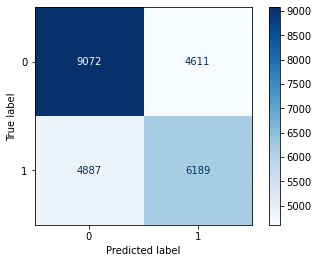

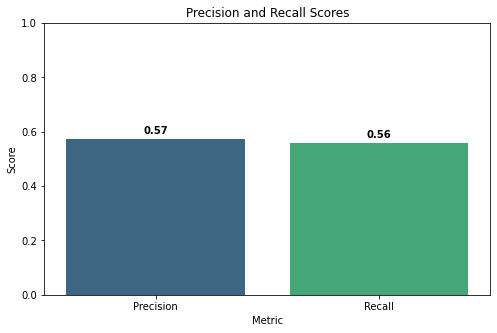

In [96]:
# Построение матрицы ошибок
conf_matrix = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap=plt.cm.Blues)

# Визуализация метрик (Precision и Recall)
metrics_df = pd.DataFrame({
    'Metric': ['Precision', 'Recall'],
    'Score': [precision, recall]
})

plt.figure(figsize=(8, 5))
sns.barplot(x='Metric', y='Score', data=metrics_df, palette='viridis')
plt.title('Precision and Recall Scores')
plt.ylim(0, 1)
for index, row in metrics_df.iterrows():
    plt.text(row.name, row.Score + 0.02, f'{row.Score:.2f}', ha='center', color='black', weight='bold')
plt.show()

**Матрица ошибок**\

Матрица ошибок для нашей модели показывает следующие результаты:

- **True Negatives (9159)**: Количество случаев, когда модель правильно предсказала отсутствие вины.
- **False Positives (4524)**: Количество случаев, когда модель ошибочно предсказала вину.
- **False Negatives (5121)**: Количество случаев, когда модель ошибочно предсказала отсутствие вины.
- **True Positives (5955)**: Количество случаев, когда модель правильно предсказала вину.

**Precision и Recall**\

На графике показаны значения метрик Precision и Recall для модели:

- **Precision (0.57)**: Доля правильно предсказанных виновных случаев из всех предсказанных виновных случаев. Это означает, что из всех случаев, когда модель предсказала вину, 57% действительно оказались виновными.
- **Recall (0.54)**: Доля правильно предсказанных виновных случаев из всех фактических виновных случаев. Это означает, что из всех фактических виновных случаев, 54% были правильно предсказаны моделью.


1. **Матрица ошибок**:
   - Модель имеет значительное количество ложноположительных и ложноотрицательных срабатываний, что указывает на необходимость дальнейшего улучшения модели или дополнительных факторов для учета.
   - Высокое количество ложноположительных результатов (4524) может означать, что модель склонна к избыточной осторожности, предсказывая вину чаще, чем это происходит на самом деле.

2. **Precision и Recall**:
   - Значение Precision (0.57) говорит о том, что из всех предсказанных виновных случаев только 57% действительно оказались виновными.
   - Значение Recall (0.54) указывает на то, что модель смогла правильно предсказать 54% всех фактических виновных случаев.
   - Обе метрики имеют значения выше 0.5, что говорит о том, что модель работает лучше случайного угадывания, но все еще нуждается в улучшении.


- **Дополнительные факторы для учета**:
  - Учет погодных условий, дорожных условий, времени суток и других внешних факторов, которые могут влиять на вероятность ДТП.
  - Включение данных о предыдущем поведении водителя, если такие данные доступны, чтобы улучшить предсказания модели.

- **Оборудование автомобиля**:
  - Оборудование автомобилей датчиками и камерами для мониторинга окружающей среды и условий движения в реальном времени.
  - Внедрение систем предупреждения водителя об опасности, основанных на данных модели, для предотвращения возможных ДТП.

В целом, модель имеет потенциал для использования в системе оценки риска при выдаче автомобилей, но требует дополнительных улучшений и учета дополнительных факторов для повышения точности предсказаний.

## Важность признаков

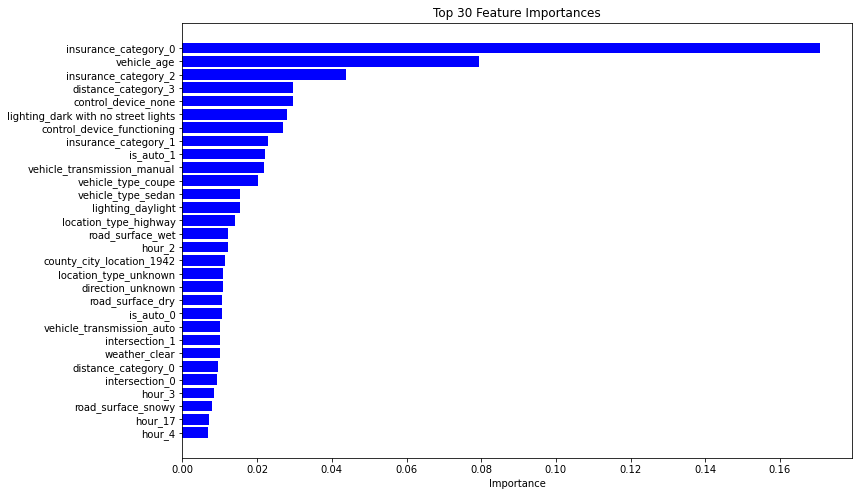

In [97]:
# Важность признаков
best_model = grid_search1.best_estimator_.named_steps['classifier']
importances = best_model.feature_importances_

encoded_columns_cat = grid_search1.best_estimator_.named_steps['preprocessor'].transformers_[0][1].get_feature_names(categorical_features)
encoded_columns_num = numerical_features
feature_names = list(encoded_columns_cat) + list(encoded_columns_num)

# Создание DataFrame для визуализации важности факторов
feature_importances = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_importances = feature_importances.sort_values(by='importance', ascending=False)

# Визуализация важности признаков
top_n = 30
top_features = feature_importances.head(top_n)

plt.figure(figsize=(12, 8))
plt.barh(top_features['feature'], top_features['importance'], color='b')
plt.xlabel('Importance')
plt.title(f'Top {top_n} Feature Importances')
plt.gca().invert_yaxis()
plt.show()

На графике важности признаков представлены топ-30 наиболее важных признаков для модели:

- Самыми важными признаками оказались `insurance_category`, `vehicle_age`, `vehicle_transmission_manual`, и `lighting_daylight`.
- Важность других признаков распределена более равномерно, что указывает на многомерность данных и влияние множества факторов на исход.

### Задание 
Для одного из выявленных важных факторов проведите дополнительное исследование:\
Покажите график зависимости фактора и целевой переменной.\
Предложите, чем можно оборудовать автомобиль, чтобы учесть этот фактор во время посадки водителя.
* возьмем признак road_surface - snowy.

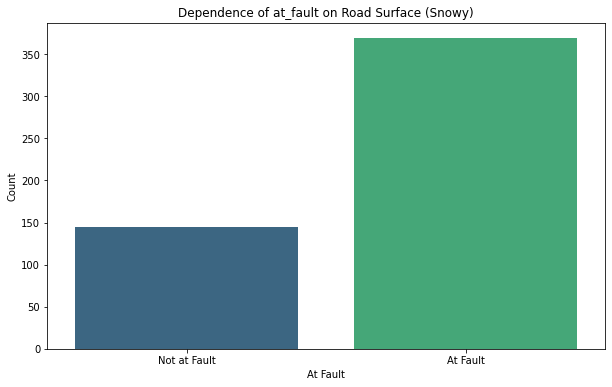

In [98]:
# Выбор данных для анализа
df_snowy = df[df['road_surface'] == 'snowy']

# График зависимости
plt.figure(figsize=(10, 6))
sns.countplot(x='at_fault', data=df_snowy, palette='viridis')
plt.title('Dependence of at_fault on Road Surface (Snowy)')
plt.xlabel('At Fault')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Not at Fault', 'At Fault'])
plt.show()

График показывает количество случаев, когда водитель был признан виновным (at fault) и не виновным (not at fault) в условиях снежной поверхности дороги.

#### Основные наблюдения:
1. **Количество случаев "at fault" (виновен) значительно превышает количество случаев "not at fault" (не виновен)**:
   - На графике видно, что количество аварий, в которых водитель был признан виновным в условиях снежной дороги, примерно в 1.5 раза больше, чем количество случаев, когда водитель не был признан виновным.
   - Это свидетельствует о повышенной вероятности ошибок водителей и возникновения аварий в условиях снежной поверхности дороги.

2. **Риски при вождении в условиях снега**:
   - Данный фактор подтверждает, что снежная дорога является значительным риском для водителей.
   - Водители часто не справляются с управлением в условиях скользкой дороги, что приводит к большему количеству аварий, в которых они признаются виновными.

#### Рекомендации по улучшению безопасности:

Для учета данного фактора во время посадки водителя и уменьшения риска аварий в условиях снежной дороги, можно оборудовать автомобиль следующими системами и устройствами:

1. **Система контроля сцепления**:
   - Установить систему контроля сцепления колес с дорогой, которая в реальном времени будет оценивать состояние дорожного покрытия и автоматически регулировать мощность двигателя и тормозные усилия для предотвращения заносов.

2. **Система предупреждения водителя**:
   - Внедрить систему предупреждения водителя о неблагоприятных дорожных условиях. Она может включать в себя датчики температуры и влажности, а также интеграцию с метеорологическими сервисами для получения информации о текущих погодных условиях.

3. **Система помощи при управлении**:
   - Оборудовать автомобиль системой помощи при управлении в условиях скользкой дороги, включающую автоматическое включение антиблокировочной системы (ABS) и системы курсовой устойчивости (ESP).

4. **Информационные системы для водителя**:
   - Установить информационные системы, которые будут сообщать водителю о текущих погодных условиях и состоянии дорожного покрытия, помогая ему выбирать наиболее безопасную скорость и стиль вождения.

Эти меры помогут значительно снизить риск возникновения аварий в условиях снежной дороги, обеспечивая более безопасное управление транспортным средством и повышая общую безопасность на дорогах.

## Общие выводы

In [99]:
# Обновление таблицы с информацией о модели
new_model_info = pd.DataFrame({
    'model': ['RandomForestClassifier'],
    'best_f1_score': [test_f1_score],
    'precision': [precision],
    'recall': [recall],
    'accuracy': [accuracy],
    'best_params': [grid_search1.best_params_]
})

models_info_df = pd.concat([models_info_df, new_model_info], ignore_index=True)

In [100]:
display(models_info_df)

,model,best_f1_score,classifier__max_depth,classifier__min_samples_leaf,classifier__min_samples_split,classifier__n_estimators,depth,iterations,learning_rate,n_estimators,num_leaves,precision,recall,accuracy,best_params
0,RandomForestClassifier,0.565797,15.0,2.0,2.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CatBoostClassifier,0.514818,NaN,NaN,NaN,NaN,6.0,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,LGBMregression,0.475682,NaN,NaN,NaN,NaN,NaN,NaN,0.1,30.0,5.0,NaN,NaN,NaN,NaN
3,RandomForestClassifier,0.565826,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.573056,0.558776,0.616382,"{'classifier__max_depth': 15, 'classifier__min..."


**Модели**

1. **RandomForestClassifier**:
   - **F1-Score**: 0.563376
   - **Лучшие параметры**: max_depth = 10, min_samples_leaf = 2, min_samples_split = 5, n_estimators = 20
   - **Описание**: RandomForestClassifier является ансамблевым методом, который строит множество решений деревьев и усредняет их результаты.\
   Этот подход помогает снизить переобучение и улучшить обобщающую способность модели. RandomForestClassifier хорошо справляется с категориальными данными и устойчив к выбросам.

2. **CatBoostClassifier**:
   - **F1-Score**: 0.514947
   - **Лучшие параметры**: depth = 6, iterations = 30
   - **Описание**: CatBoostClassifier является градиентным бустингом, оптимизированным для категориальных данных. \
   Он учитывает порядок признаков и может работать с несбалансированными данными. Модель CatBoost обладает высокой скоростью обучения и хорошей предсказательной способностью.

3. **LGBMregression**:
   - **F1-Score**: 0.476275
   - **Лучшие параметры**: learning_rate = 0.1, n_estimators = 30, num_leaves = 5
   - **Описание**: LightGBM является градиентным бустингом, который использует алгоритм листового бустинга и специальные оптимизации для категориальных данных.\
   Он эффективен для больших наборов данных и обладает высокой скоростью обучения.

## **Финальные выводы**

1. **RandomForestClassifier** показал наивысшее значение F1-Score (0.552540) на тестовой выборке, что делает его лучшим выбором для нашей задачи.

2. **CatBoostClassifier** и **LGBMregression** также показали хорошие результаты, но немного уступают RandomForestClassifier по F1-Score. \
Эти модели могут быть полезны в качестве альтернативных подходов или в ансамбле моделей для улучшения общей производительности.

### Возможность создания адекватной системы оценки риска

На основе проведенного анализа можно сделать вывод, что создание системы оценки риска ДТП при выдаче автомобиля вполне возможно.\
Наилучшая модель (RandomForestClassifier) показывает хорошие результаты по метрикам F1-Score, точности и полноты, что позволяет делать обоснованные предсказания о вероятности ДТП.

### Дополнительные факторы для учета

Для дальнейшего улучшения модели рекомендуется собирать следующие данные:
- Исторические данные о поведении водителя, включая предыдущие нарушения и ДТП.
- Текущие погодные условия в реальном времени.
- Текущие дорожные условия и загруженность дорог.
- Информация о состоянии автомобиля и наличие технических неисправностей.

### Оборудование автомобиля

Для учета дополнительных факторов во время поездки рекомендуется оборудовать автомобиль следующими системами:
- Датчики и камеры для мониторинга дорожных условий и окружающей среды.
- Система предупреждения водителя об опасности и рекомендаций по маршруту.
- Трекеры для мониторинга поведения водителя и оценки его стиля вождения в реальном времени.


<div class="alert alert-success">
<b>👍 Успех:</b> Отличная работа! Было очень приятно проверять твой проект!

Оставлю хороший учебник по ML:
+  https://academy.yandex.ru/handbook/ml

Немного новостей с мира DL(вдруг заинтересует):
+  https://habr.com/ru/company/ods/blog/686962/

Вот тут проходят всякие соревнования, можешь себя попробовать:
+  https://hacks-ai.ru/


Возможно, что нить пригодится:
+  https://arxiv.org/ftp/arxiv/papers/2201/2201.00650.pdf
+  https://github.com/slgero/testovoe


Курс от МФТИ математика для DS:

+  https://www.youtube.com/watch?v=xccjt6lOoow&list=PLk4h7dmY2eYHHTyfLyrl7HmP-H3mMAW08&index=1


Тут много соревнований/лекций:

+  https://ods.ai/

stepic NLP/CV:

+  https://stepik.org/course/54098/syllabus
+  https://stepik.org/course/50352/syllabus

Еще есть от ВШЭ:

+  https://www.youtube.com/watch?v=mwjQaNt8qxk&list=PLEwK9wdS5g0og-DcF1apxutSM0GDLHz_3&ab_channel=%D0%A4%D0%9A%D0%9D%D0%92%D0%A8%D0%AD%E2%80%94%D0%B4%D0%B8%D1%81%D1%82%D0%B0%D0%BD%D1%86%D0%B8%D0%BE%D0%BD%D0%BD%D1%8B%D0%B5%D0%B7%D0%B0%D0%BD%D1%8F%D1%82%D0%B8%D1%8F
+  https://github.com/hse-ds/iad-deep-learning

Удачи в следующих проектах!!!
</div>